# Métodos Numéricos para Equações Diferenciais II – 2023/2

**Aluno:** Matheus de Costa Harduim.

**Professor:** Grazione de Souza.

**Instituição:** UERJ – IPRJ – DMC

### Desenvolvimento dos códigos e comentários.

Importando as bibliotecas do python que serão utilizadas

In [1]:
import numpy.matlib
import numpy as np
import time
import matplotlib.pyplot as plt

# Trabalho 1

## Dados do problema
- $u = 0.25$
- $ \alpha = 0,1$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

In [2]:
u = 0.25
alpha = 0.1
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltX = 0.05
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

In [3]:
def metodoEx(u,alpha,ca,cb,lX,tTotal,deltX,porcAvan):
    # definicao do numero de volumes
    nx = int(lX/deltX)
    print(f'numero de volumes: {nx}')
    # definicao deltaT e passos de tempo
    # Considerando a condição de tempo do qual o método é estável
    deltT = 0.9*(1 /((u/deltX) + (2*alpha/(deltX**2))))
    n = int(tTotal/deltT)
    print(f'valor passo de tempo deltaT: {deltT}')
    print(f'numero de passos de tempo: {n}')
    # inicializando o vetor considerando as condicoes de contorno
    qInit = []
    for i in range(nx):
        if i < int(nx*porcAvan):
            qInit.append(ca)
        if i >= int(nx*porcAvan):
            qInit.append(cb)
    # inicia o c iterativo
    #---------------------
    cItr = ca
    qFinal = qInit
    espaco = [0.0]
    for k in range(nx-1):
        espaco.append(espaco[k] + deltX)
    for i in range(n):
        qItr = []
        #-----------------
        #definição de mudança de vazão
        if i >= n/2:
            cItr = ca*1.2
        q0 = 2*cItr - qFinal[0]
        for j in range(nx):
            if j == 0:
                qItr.append(
                    qFinal[j] - (deltT/deltX)*
                    (u*(qFinal[j]-q0)-alpha*((qFinal[j+1]-2*qFinal[j]+q0)/deltX)))
            elif j == nx-1:
                qItr.append(qFinal[j] - (deltT/deltX)*
                            (u*(qFinal[j]-qFinal[j-1])-alpha*((qFinal[j]-2*qFinal[j]+qFinal[j-1])/deltX)))
            else:
                qItr.append(qFinal[j] - (deltT/deltX)*
                            (u*(qFinal[j]-qFinal[j-1])-alpha*((qFinal[j+1]-2*qFinal[j]+qFinal[j-1])/deltX)))
        qFinal = qItr
    return espaco, qFinal
    

In [4]:
x, Qs = metodoEx(u,alpha,ca,cb,lX,tTotal,deltX,porcAvan)

numero de volumes: 200
valor passo de tempo deltaT: 0.010588235294117648
numero de passos de tempo: 472


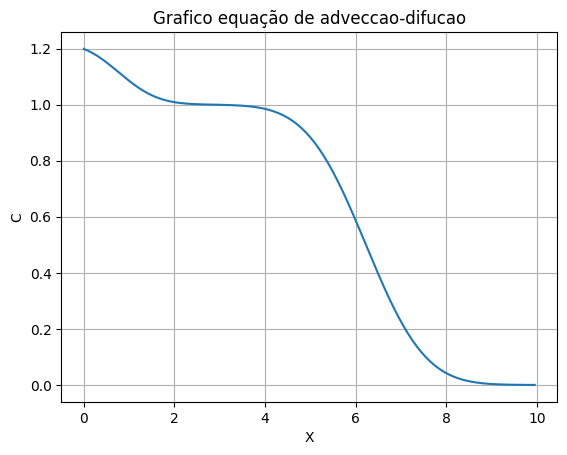

In [5]:
plt.figure()
plt.title(f'Grafico equação de adveccao-difucao')
plt.plot(x,Qs)
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Teste variação da velocidade de advecção
- $u = varia$
- $ \alpha = 0,1$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

In [6]:
us = 0.25*np.array([0.0,0.6,0.8,1.0,1.2,1.4])
alpha = 0.1
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltX = 0.05
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

numero de volumes: 200
valor passo de tempo deltaT: 0.011250000000000003
numero de passos de tempo: 444
numero de volumes: 200
valor passo de tempo deltaT: 0.010843373493975905
numero de passos de tempo: 461
numero de volumes: 200
valor passo de tempo deltaT: 0.010714285714285718
numero de passos de tempo: 466
numero de volumes: 200
valor passo de tempo deltaT: 0.010588235294117648
numero de passos de tempo: 472
numero de volumes: 200
valor passo de tempo deltaT: 0.010465116279069769
numero de passos de tempo: 477
numero de volumes: 200
valor passo de tempo deltaT: 0.010344827586206898
numero de passos de tempo: 483


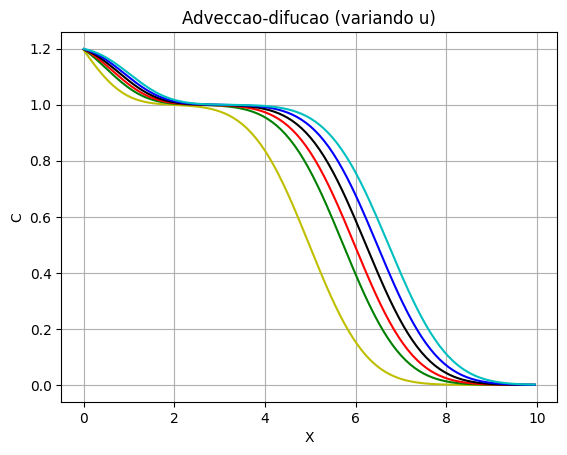

In [7]:
QsItr = []
xItr = []
for u in us:
    x, Qs = metodoEx(u,alpha,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['y','g','r','k','b','c']
plt.title(f'Adveccao-difucao (variando u)')
for u in us:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Teste variação do termo de difusão
- $u = 0,25$
- $ \alpha = varia$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

In [8]:
u = 0.25
alphas = 0.1*np.array([0.0,0.6,0.8,1.0,1.2,1.4])
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltX = 0.05
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

numero de volumes: 200
valor passo de tempo deltaT: 0.18000000000000002
numero de passos de tempo: 27
numero de volumes: 200
valor passo de tempo deltaT: 0.016981132075471705
numero de passos de tempo: 294
numero de volumes: 200
valor passo de tempo deltaT: 0.013043478260869566
numero de passos de tempo: 383
numero de volumes: 200
valor passo de tempo deltaT: 0.010588235294117648
numero de passos de tempo: 472
numero de volumes: 200
valor passo de tempo deltaT: 0.008910891089108914
numero de passos de tempo: 561
numero de volumes: 200
valor passo de tempo deltaT: 0.0076923076923076945
numero de passos de tempo: 649


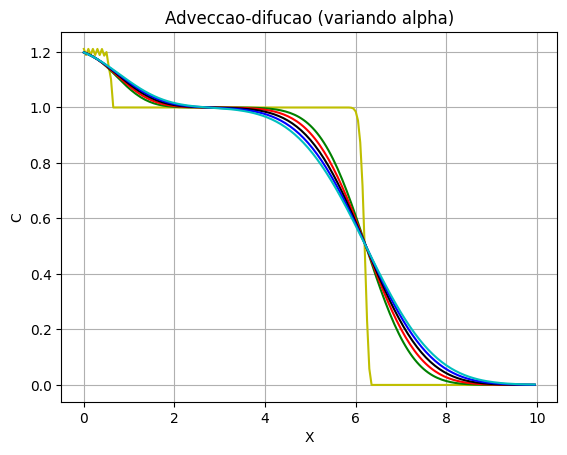

In [9]:
QsItr = []
xItr = []
for alpha in alphas:
    x, Qs = metodoEx(u,alpha,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['y','g','r','k','b','c']
plt.title(f'Adveccao-difucao (variando alpha)')
for alpha in alphas:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Teste variação do Lx
- $u = 0,25$
- $ \alpha = 0.1$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = varia$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

In [10]:
u = 0.25
alpha = 0.1
ca = 1.0
cb = 0.0
lXs = 10.0*np.array([0.6,0.8,1.0,1.2,1.4])
tTotal = 5
deltX = 0.05
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

numero de volumes: 120
valor passo de tempo deltaT: 0.010588235294117648
numero de passos de tempo: 472
numero de volumes: 160
valor passo de tempo deltaT: 0.010588235294117648
numero de passos de tempo: 472
numero de volumes: 200
valor passo de tempo deltaT: 0.010588235294117648
numero de passos de tempo: 472
numero de volumes: 240
valor passo de tempo deltaT: 0.010588235294117648
numero de passos de tempo: 472
numero de volumes: 280
valor passo de tempo deltaT: 0.010588235294117648
numero de passos de tempo: 472


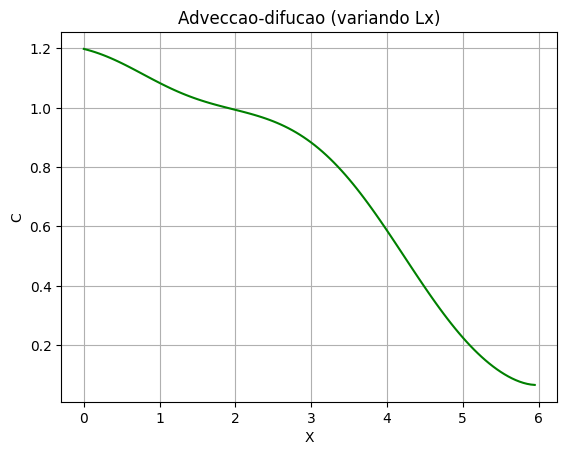

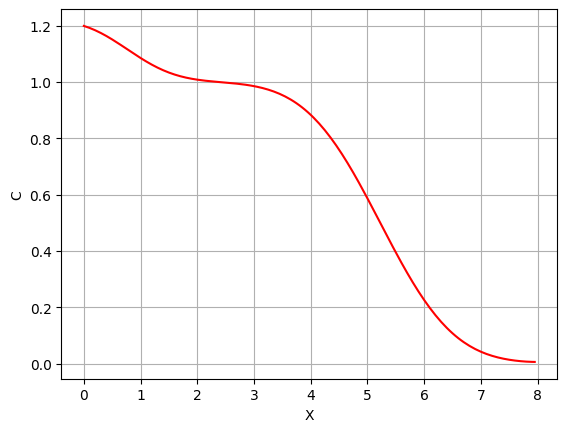

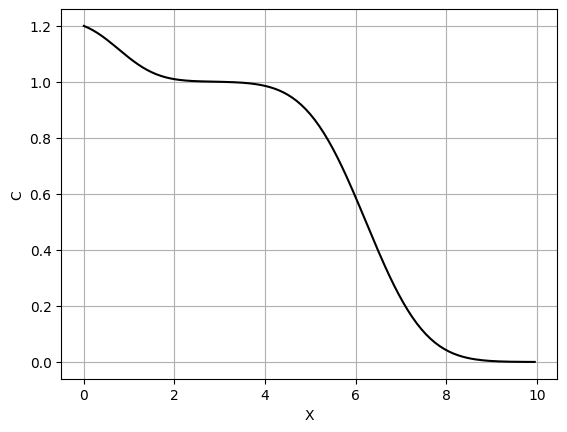

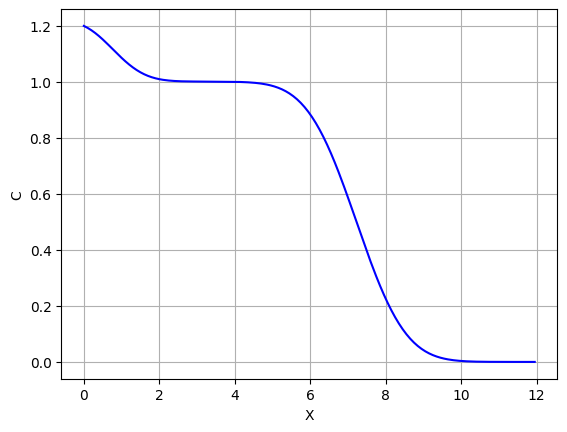

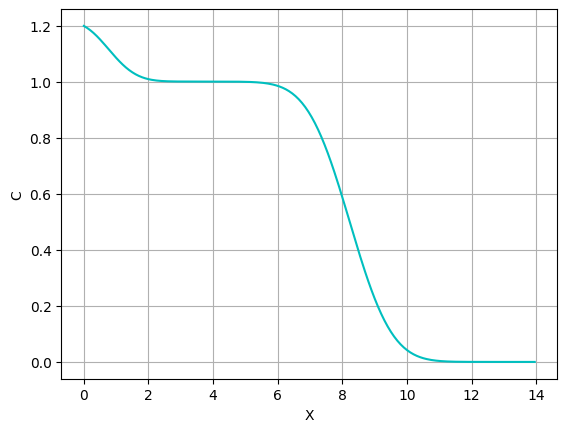

In [11]:
QsItr = []
xItr = []
for lX in lXs:
    x, Qs = metodoEx(u,alpha,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr.append(x)
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'Adveccao-difucao (variando Lx)')

for lX in lXs:
    plt.plot(xItr[i],QsItr[i], color = colors[i])
    plt.xlabel('X')
    plt.ylabel('C')
    plt.grid()
    plt.show()
    i+=1

## Teste variação do tempo totalX
- $u = 0,25$
- $ \alpha = 0,1$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = varia$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

In [12]:
u = 0.25
alpha = 0.1
ca = 1.0
cb = 0.0
lX = 10.0
tTotals = 5*np.array([0.6,0.8,1.0,1.2,1.4])
deltX = 0.05
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

numero de volumes: 200
valor passo de tempo deltaT: 0.010588235294117648
numero de passos de tempo: 283
numero de volumes: 200
valor passo de tempo deltaT: 0.010588235294117648
numero de passos de tempo: 377
numero de volumes: 200
valor passo de tempo deltaT: 0.010588235294117648
numero de passos de tempo: 472
numero de volumes: 200
valor passo de tempo deltaT: 0.010588235294117648
numero de passos de tempo: 566
numero de volumes: 200
valor passo de tempo deltaT: 0.010588235294117648
numero de passos de tempo: 661


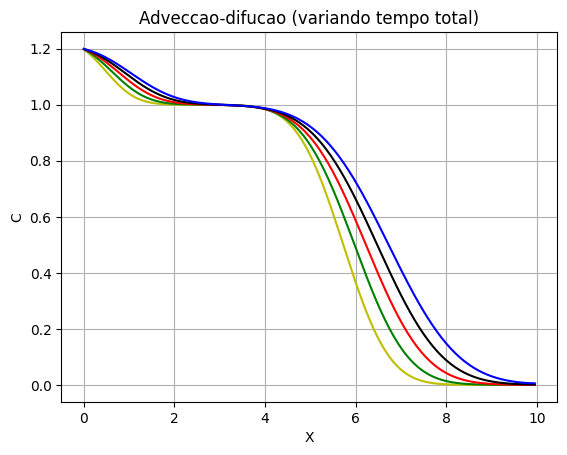

In [13]:
QsItr = []
xItr = []
for tTotal in tTotals:
    x, Qs = metodoEx(u,alpha,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['y','g','r','k','b','c']
plt.title(f'Adveccao-difucao (variando tempo total)')
for tTotal in tTotals:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Teste variação de deltaX
- $u = 0,25$
- $ \alpha = 0,1$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = varia$
- $\%\ de\ avanço = 1/2$

In [14]:
u = 0.25
alpha = 0.1
ca = 1.0
cb = 0.0
lXs = 10.0
tTotal = 5
deltXs = 0.05*np.array([0.6,0.8,1.0,1.2,1.4])
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

numero de volumes: 333
valor passo de tempo deltaT: 0.0039036144578313255
numero de passos de tempo: 1280
Tempo de execucao: 0.34409189224243164 segundos
numero de volumes: 249
valor passo de tempo deltaT: 0.00685714285714286
numero de passos de tempo: 729
Tempo de execucao: 0.1361992359161377 segundos
numero de volumes: 200
valor passo de tempo deltaT: 0.010588235294117648
numero de passos de tempo: 472
Tempo de execucao: 0.06929349899291992 segundos
numero de volumes: 166
valor passo de tempo deltaT: 0.015069767441860466
numero de passos de tempo: 331
Tempo de execucao: 0.0409693717956543 segundos
numero de volumes: 142
valor passo de tempo deltaT: 0.020275862068965513
numero de passos de tempo: 246
Tempo de execucao: 0.02580094337463379 segundos


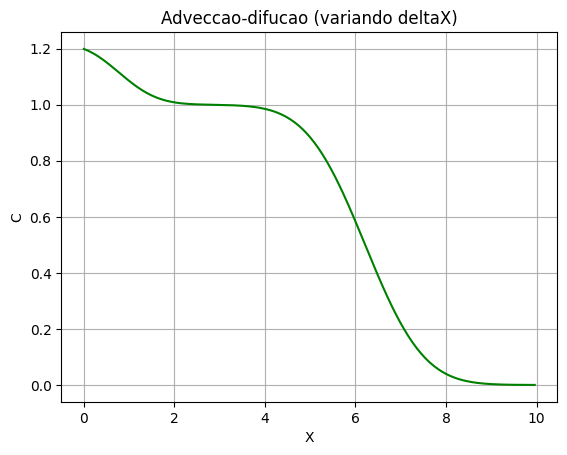

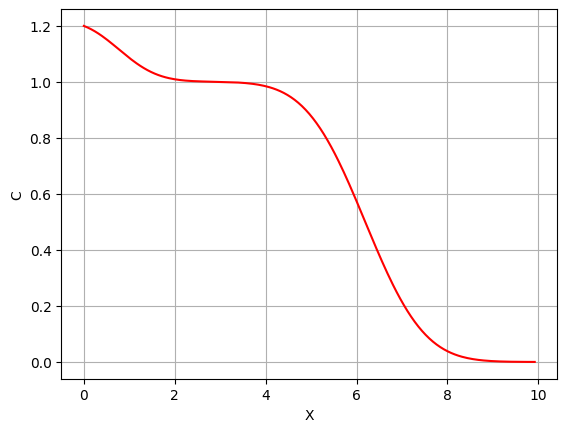

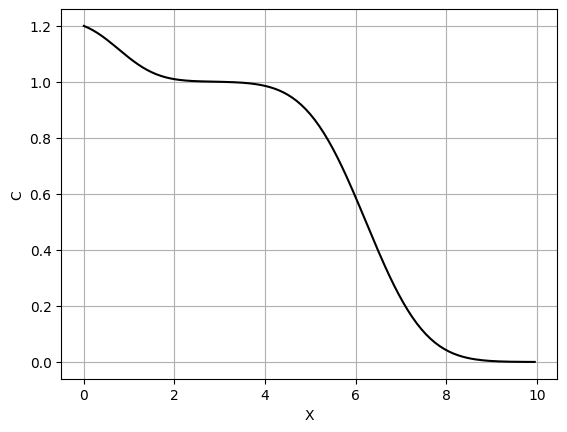

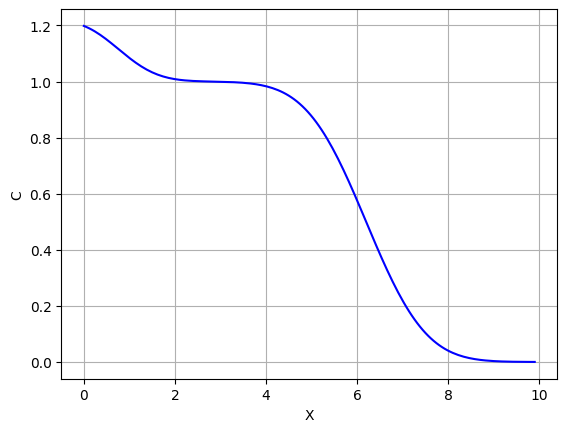

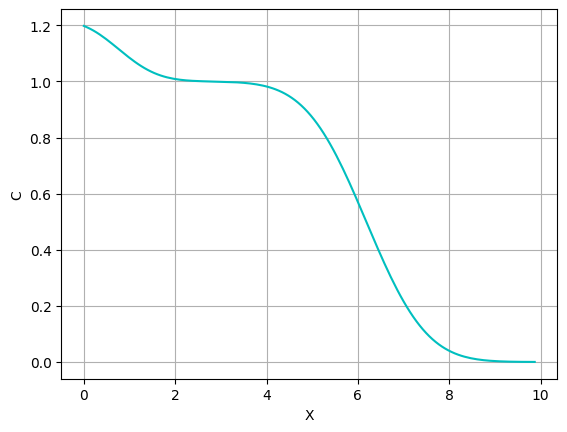

In [15]:
QsItr = []
xItr = []
for deltX in deltXs:
    start_time = time.time()
    x, Qs = metodoEx(u,alpha,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr.append(x)
    QsItr.append(Qs)
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Tempo de execucao: {elapsed_time} segundos")
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'Adveccao-difucao (variando deltaX)')

for deltX in deltXs:
    plt.plot(xItr[i],QsItr[i], color = colors[i])
    plt.xlabel('X')
    plt.ylabel('C')
    plt.grid()
    plt.show()
    i+=1

## Teste variação da porcentagem de avanço
- $u = 0,25$
- $ \alpha = 0,1$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = varia$

In [16]:
u = 0.25
alpha = 0.1
ca = 1.0
cb = 0.0
lXs = 10.0
tTotal = 5
deltX = 0.05
porcAvans = 1/2*np.array([0.6,0.8,1.0,1.2,1.4])
# percentual de como os volumes estam preenchidos

numero de volumes: 200
valor passo de tempo deltaT: 0.010588235294117648
numero de passos de tempo: 472
numero de volumes: 200
valor passo de tempo deltaT: 0.010588235294117648
numero de passos de tempo: 472
numero de volumes: 200
valor passo de tempo deltaT: 0.010588235294117648
numero de passos de tempo: 472
numero de volumes: 200
valor passo de tempo deltaT: 0.010588235294117648
numero de passos de tempo: 472
numero de volumes: 200
valor passo de tempo deltaT: 0.010588235294117648
numero de passos de tempo: 472


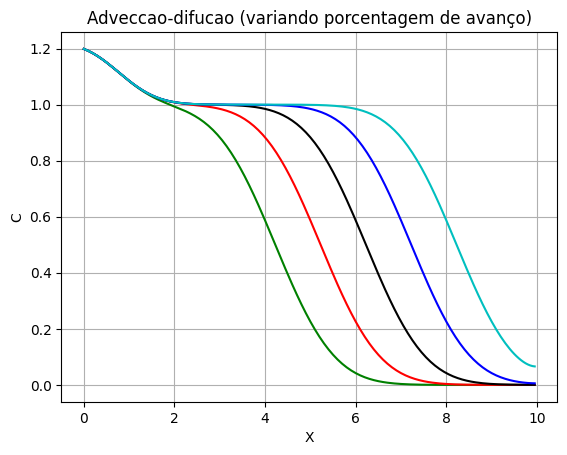

In [17]:
QsItr = []
xItr = []
for porcAvan in porcAvans:
    x, Qs = metodoEx(u,alpha,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'Adveccao-difucao (variando porcentagem de avanço)')
for porcAvan in porcAvans:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Testes de variação específica do código

### Teste de variação da vazão de Injeção
- $u = 0,25$
- $ \alpha = 0,1$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$
- $cItr = varia$

In [18]:
u = 0.25
alpha = 0.1
ca = 1.0
cb = 0.0
lXs = 10.0
tTotal = 5
deltX = 0.05
porcAvans = 1/2
cInjItrs = 1.2*np.array([0.6,0.8,1.0,1.2,1.4])
# percentual de como os volumes estam preenchidos

In [19]:
def metodoExManipulado(u,alpha,ca,cb,lX,tTotal,deltX,porcAvan, cItr):
    # definicao do numero de volumes
    nx = int(lX/deltX)
    print(f'numero de volumes: {nx}')
    # definicao deltaT e passos de tempo
    # Considerando a condição de tempo do qual o método é estável
    deltT = 0.9*(1 /((u/deltX) + (2*alpha/(deltX**2))))
    n = int(tTotal/deltT)
    print(f'valor passo de tempo deltaT: {deltT}')
    print(f'numero de passos de tempo: {n}')
    # inicializando o vetor considerando as condicoes de contorno
    qInit = []
    for i in range(nx):
        if i < int(nx*porcAvan):
            qInit.append(ca)
        if i >= int(nx*porcAvan):
            qInit.append(cb)
    # inicia o c iterativo
    #---------------------
    cItr = ca
    qFinal = qInit
    espaco = [0.0]
    for k in range(nx-1):
        espaco.append(espaco[k] + deltX)
    for i in range(n):
        qItr = []
        #-----------------
        #definição de mudança de vazão
        if i >= n/2:
            cItr = ca*cInjItr
        q0 = 2*cItr - qFinal[0]
        for j in range(nx):
            if j == 0:
                qItr.append(
                    qFinal[j] - (deltT/deltX)*
                    (u*(qFinal[j]-q0)-alpha*((qFinal[j+1]-2*qFinal[j]+q0)/deltX)))
            elif j == nx-1:
                qItr.append(qFinal[j] - (deltT/deltX)*
                            (u*(qFinal[j]-qFinal[j-1])-alpha*((qFinal[j]-2*qFinal[j]+qFinal[j-1])/deltX)))
            else:
                qItr.append(qFinal[j] - (deltT/deltX)*
                            (u*(qFinal[j]-qFinal[j-1])-alpha*((qFinal[j+1]-2*qFinal[j]+qFinal[j-1])/deltX)))
        qFinal = qItr
    return espaco, qFinal
    

numero de volumes: 200
valor passo de tempo deltaT: 0.010588235294117648
numero de passos de tempo: 472
numero de volumes: 200
valor passo de tempo deltaT: 0.010588235294117648
numero de passos de tempo: 472
numero de volumes: 200
valor passo de tempo deltaT: 0.010588235294117648
numero de passos de tempo: 472
numero de volumes: 200
valor passo de tempo deltaT: 0.010588235294117648
numero de passos de tempo: 472
numero de volumes: 200
valor passo de tempo deltaT: 0.010588235294117648
numero de passos de tempo: 472


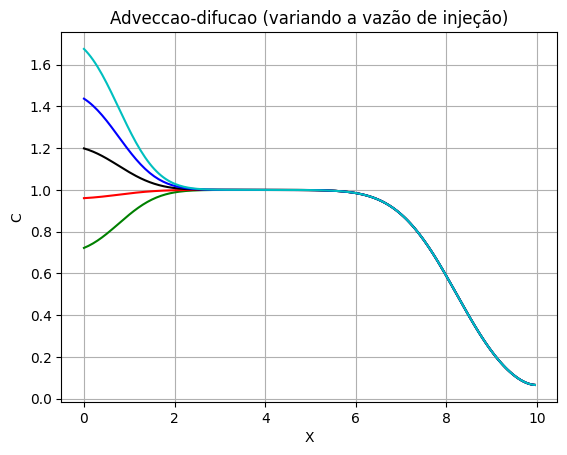

In [20]:
QsItr = []
xItr = []
for cInjItr in cInjItrs:
    x, Qs = metodoExManipulado(u,alpha,ca,cb,lX,tTotal,deltX,porcAvan, cInjItr)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'Adveccao-difucao (variando a vazão de injeção)')
for cInjItr in cInjItrs:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

### Teste de variação de deltaT forçados
- $u = 0,25$
- $ \alpha = 0,1$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$
- $\Delta t = 0,012$

In [21]:
u = 0.25
alpha = 0.1
ca = 1.0
cb = 0.0
lXs = 10.0
tTotal = 5
deltX = 0.05
porcAvans = 1/2
deltTs = 0.0116*np.array([0.8,1.0,1.2])
# percentual de como os volumes estam preenchidos

In [22]:
def metodoExManipulado(u,alpha,ca,cb,lX,tTotal,deltX,porcAvan, deltT):
    # definicao do numero de volumes
    nx = int(lX/deltX)
    print(f'numero de volumes: {nx}')
    n = int(tTotal/deltT)
    print(f'valor passo de tempo deltaT: {deltT}')
    print(f'numero de passos de tempo: {n}')
    # inicializando o vetor considerando as condicoes de contorno
    qInit = []
    for i in range(nx):
        if i < int(nx*porcAvan):
            qInit.append(ca)
        if i >= int(nx*porcAvan):
            qInit.append(cb)
    # inicia o c iterativo
    #---------------------
    cItr = ca
    qFinal = qInit
    espaco = [0.0]
    for k in range(nx-1):
        espaco.append(espaco[k] + deltX)
    for i in range(n):
        qItr = []
        #-----------------
        #definição de mudança de vazão
        if i >= n/2:
            cItr = ca*1.2
        q0 = 2*cItr - qFinal[0]
        for j in range(nx):
            if j == 0:
                qItr.append(
                    qFinal[j] - (deltT/deltX)*
                    (u*(qFinal[j]-q0)-alpha*((qFinal[j+1]-2*qFinal[j]+q0)/deltX)))
            elif j == nx-1:
                qItr.append(qFinal[j] - (deltT/deltX)*
                            (u*(qFinal[j]-qFinal[j-1])-alpha*((qFinal[j]-2*qFinal[j]+qFinal[j-1])/deltX)))
            else:
                qItr.append(qFinal[j] - (deltT/deltX)*
                            (u*(qFinal[j]-qFinal[j-1])-alpha*((qFinal[j+1]-2*qFinal[j]+qFinal[j-1])/deltX)))
        qFinal = qItr
    return espaco, qFinal
    

numero de volumes: 200
valor passo de tempo deltaT: 0.00928
numero de passos de tempo: 538
numero de volumes: 200
valor passo de tempo deltaT: 0.0116
numero de passos de tempo: 431
numero de volumes: 200
valor passo de tempo deltaT: 0.013919999999999998
numero de passos de tempo: 359


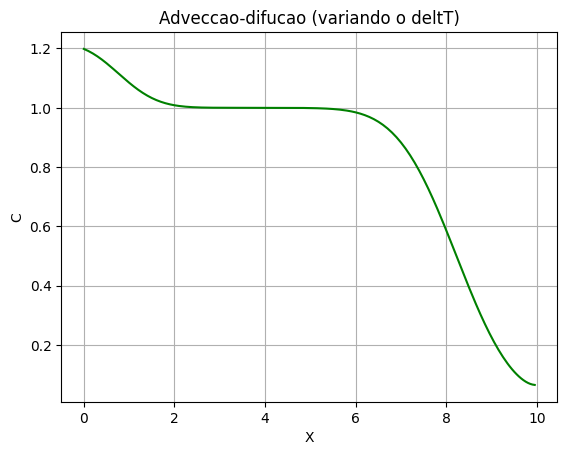

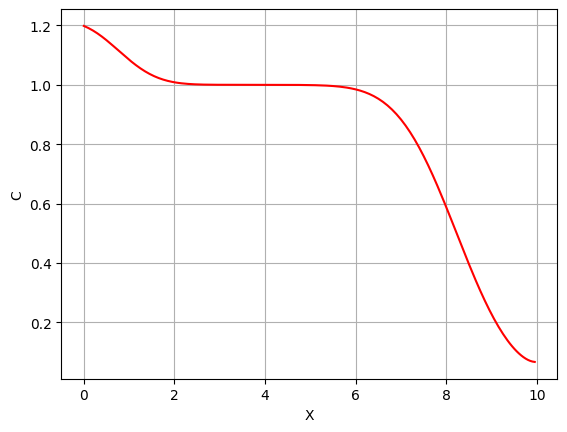

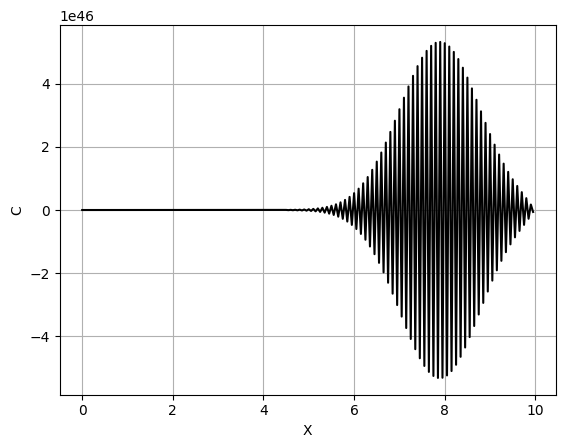

In [23]:
QsItr = []
xItr = []
for deltT in deltTs:
    x, Qs = metodoExManipulado(u,alpha,ca,cb,lX,tTotal,deltX,porcAvan, deltT)
    xItr.append(x)
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'Adveccao-difucao (variando o deltT)')
for deltT in deltTs:
    plt.plot(xItr[i],QsItr[i], color = colors[i])
    i+=1
    plt.xlabel('X')
    plt.ylabel('C')
    plt.grid()
    plt.show()

# Trabalho 2

Considerando as mesmas condições dos casos padrões anteriores, apenas removendo o termo difusivo para todos os próximos métodos

### Forward Time-Backward Space (FTBS)

## Dados do problema
- $u = 0.25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

Inicializando a variáveis

In [24]:
u = 0.25
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltX = 0.05
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

In [25]:
def metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan):
    # definicao do numero de volumes
    nx = int(lX/deltX)
    print(f'numero de volumes: {nx}')
    # definicao deltaT e passos de tempo
    # Considerando a condição de tempo do qual o método é estável
    deltT = 0.8*(1 /((u/deltX)))
    n = int(tTotal/deltT)
    print(f'valor passo de tempo deltaT: {deltT}')
    print(f'numero de passos de tempo: {n}')
    # inicializando o vetor considerando as condicoes de contorno
    qInit = []
    for i in range(nx):
        if i < int(nx*porcAvan):
            qInit.append(ca)
        if i >= int(nx*porcAvan):
            qInit.append(cb)
    # inicia o c iterativo
    #---------------------
    cItr = ca
    qFinal = qInit
    espaco = [0.0]
    for k in range(nx-1):
        espaco.append(espaco[k] + deltX)
    for i in range(n):
        qItr = []
        #-----------------
        #definição de mudança de vazão
        if i >= n/2:
            cItr = ca*1.2
        q0 = 2*cItr - qFinal[0]
        for j in range(nx):
            if j == 0:
                qItr.append(
                    qFinal[j] - (deltT/deltX)*
                    (u*(qFinal[j]-q0)))
            elif j == nx-1:
                qItr.append(qFinal[j] - (deltT/deltX)*
                            (u*(qFinal[j]-qFinal[j-1])))
            else:
                qItr.append(qFinal[j] - (deltT/deltX)*
                            (u*(qFinal[j]-qFinal[j-1])))
        qFinal = qItr
    return espaco, qFinal
    

In [26]:
x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)

numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31


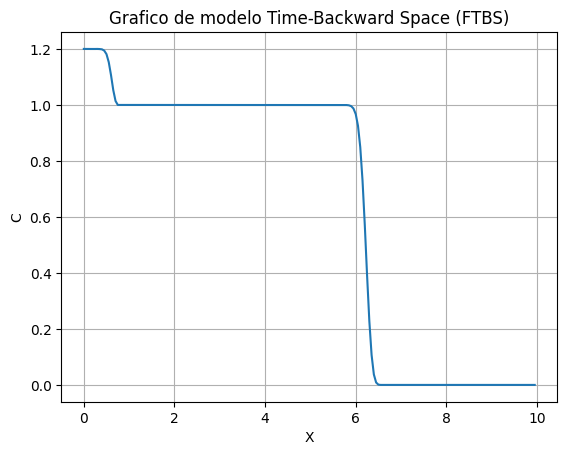

In [27]:
plt.figure()
plt.title(f'Grafico de modelo Time-Backward Space (FTBS)')
plt.plot(x,Qs)
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Teste variação da velocidade de advecção
- $u = varia$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

In [28]:
us = 0.25*np.array([0.6,0.8,1.0,1.2,1.4])
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltX = 0.05
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

numero de volumes: 200
valor passo de tempo deltaT: 0.2666666666666667
numero de passos de tempo: 18
numero de volumes: 200
valor passo de tempo deltaT: 0.2
numero de passos de tempo: 25
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.13333333333333336
numero de passos de tempo: 37
numero de volumes: 200
valor passo de tempo deltaT: 0.11428571428571431
numero de passos de tempo: 43


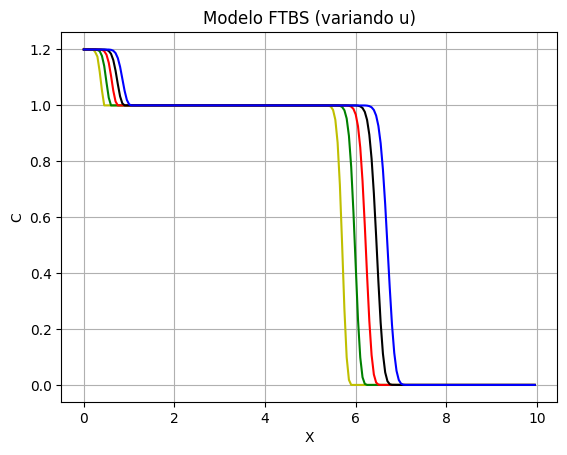

In [29]:
QsItr = []
xItr = []
for u in us:
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['y','g','r','k','b','c']
plt.title(f'Modelo FTBS (variando u)')
for u in us:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Teste variação do Lx
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = varia$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

In [30]:
u = 0.25
ca = 1.0
cb = 0.0
lXs = 10.0*np.array([0.6,0.8,1.0,1.2,1.4])
tTotal = 5
deltX = 0.05
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

numero de volumes: 120
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 160
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 240
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 280
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31


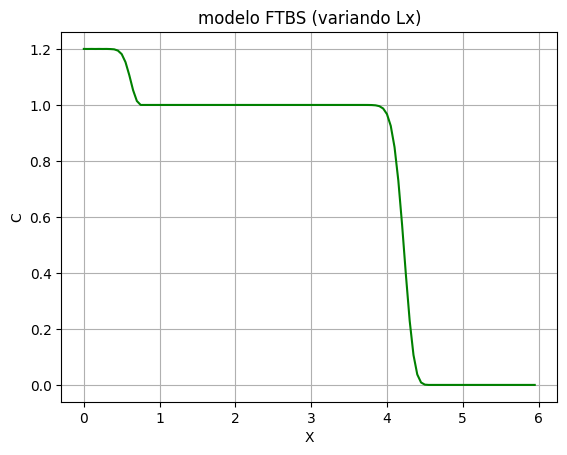

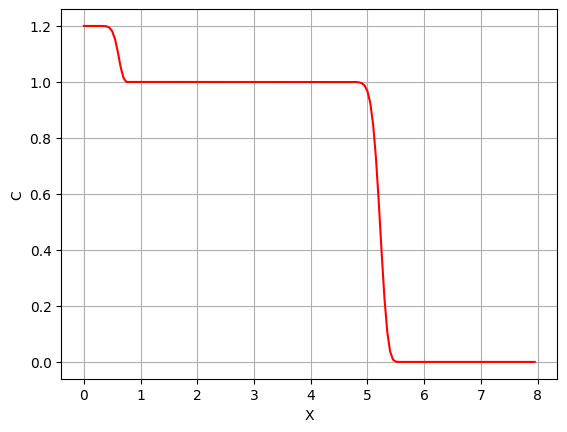

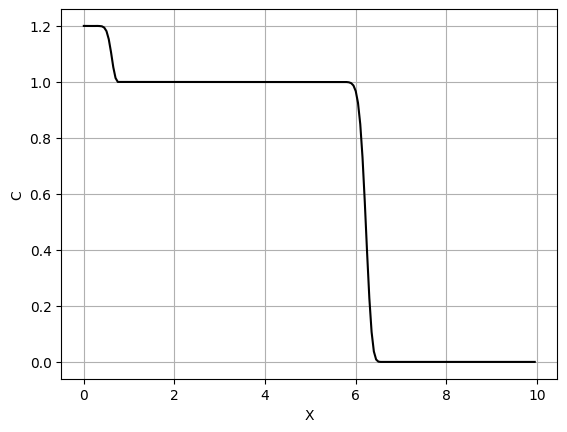

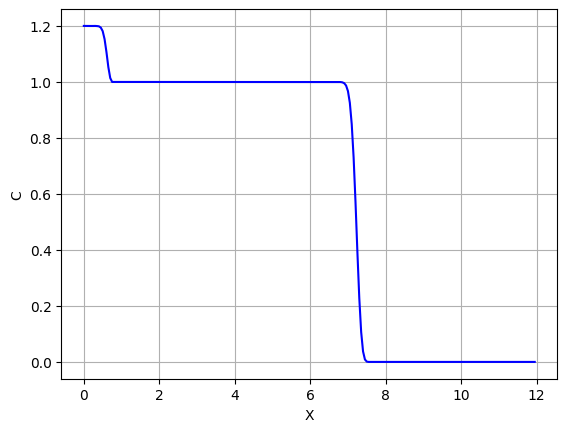

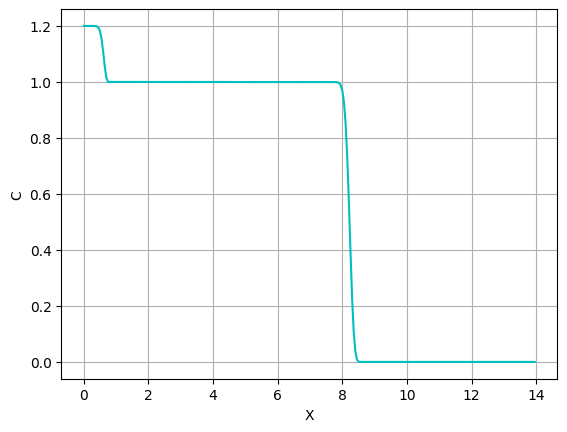

In [31]:
QsItr = []
xItr = []
for lX in lXs:
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr.append(x)
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'modelo FTBS (variando Lx)')

for lX in lXs:
    plt.plot(xItr[i],QsItr[i], color = colors[i])
    plt.xlabel('X')
    plt.ylabel('C')
    plt.grid()
    plt.show()
    i+=1

## Teste variação do tempo totalX
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = varia$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

In [32]:
u = 0.25
ca = 1.0
cb = 0.0
lX = 10.0
tTotals = 5*np.array([0.6,0.8,1.0,1.2,1.4])
deltX = 0.05
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 18
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 24
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 37
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 43


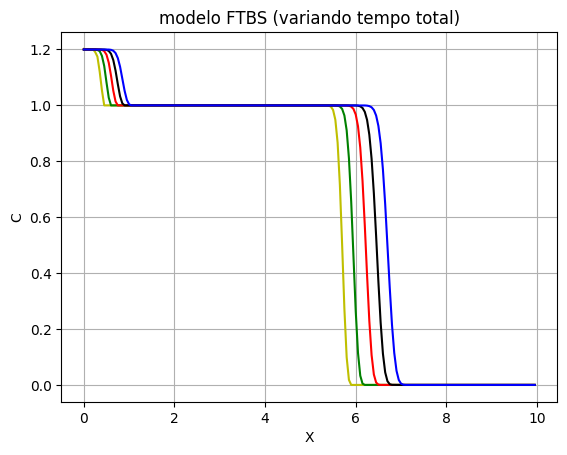

In [33]:
QsItr = []
xItr = []
for tTotal in tTotals:
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['y','g','r','k','b','c']
plt.title(f'modelo FTBS (variando tempo total)')
for tTotal in tTotals:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Teste variação de deltaX
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = varia$
- $\%\ de\ avanço = 1/2$

In [34]:
u = 0.25
ca = 1.0
cb = 0.0
lXs = 10.0
tTotal = 5
deltXs = 0.05*np.array([0.01,0.1,1.0,1.2,1.4])
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

numero de volumes: 20000
valor passo de tempo deltaT: 0.0016
numero de passos de tempo: 3125
Tempo de execucao: 23.35119104385376 segundos
numero de volumes: 1999
valor passo de tempo deltaT: 0.016000000000000004
numero de passos de tempo: 312
Tempo de execucao: 0.23239588737487793 segundos
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
Tempo de execucao: 0.0021643638610839844 segundos
numero de volumes: 166
valor passo de tempo deltaT: 0.192
numero de passos de tempo: 26
Tempo de execucao: 0.0014989376068115234 segundos
numero de volumes: 142
valor passo de tempo deltaT: 0.22399999999999998
numero de passos de tempo: 22
Tempo de execucao: 0.0011186599731445312 segundos


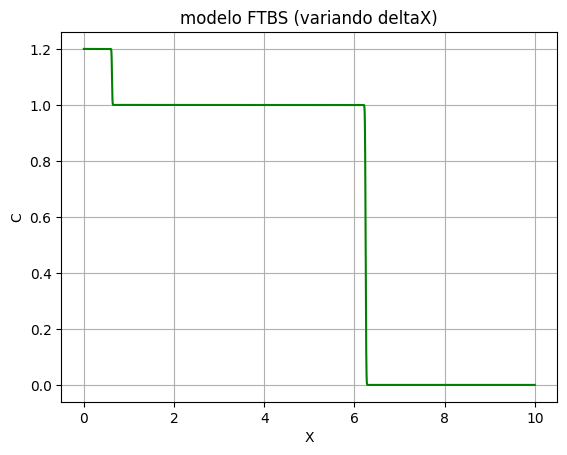

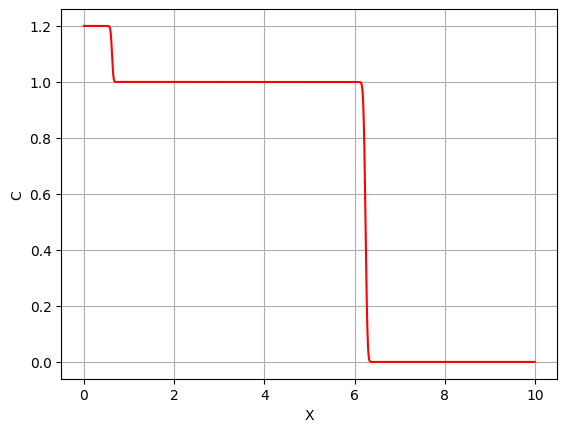

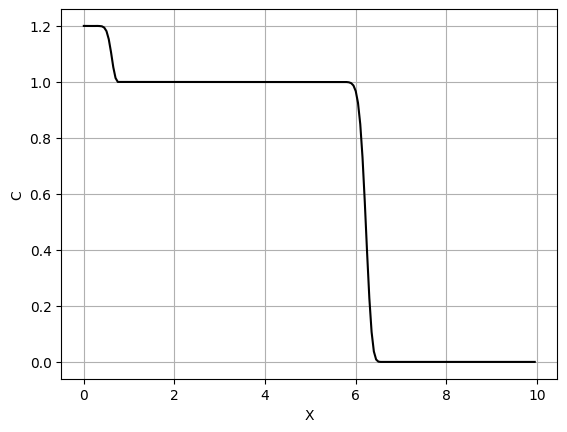

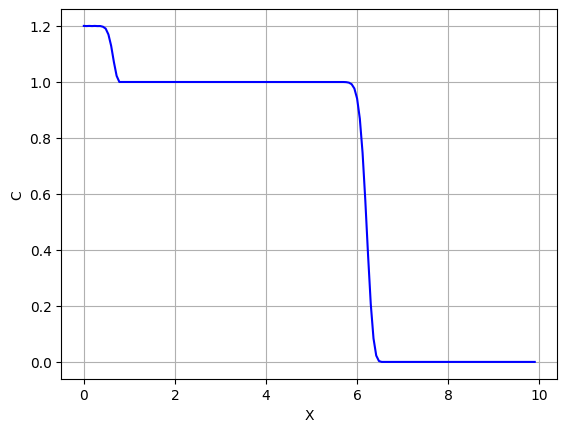

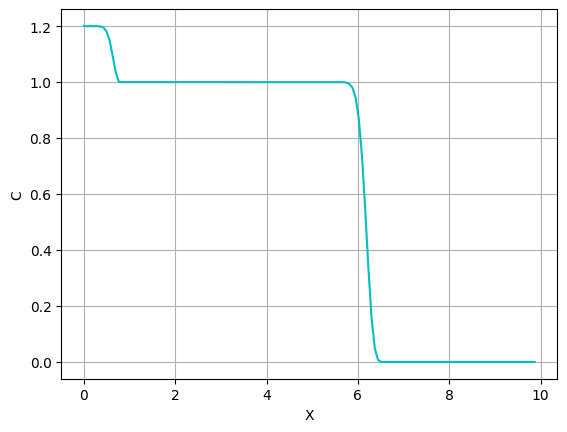

In [35]:
QsItr = []
xItr = []
for deltX in deltXs:
    start_time = time.time()
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr.append(x)
    QsItr.append(Qs)
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Tempo de execucao: {elapsed_time} segundos")
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'modelo FTBS (variando deltaX)')

for deltX in deltXs:
    plt.plot(xItr[i],QsItr[i], color = colors[i])
    plt.xlabel('X')
    plt.ylabel('C')
    plt.grid()
    plt.show()
    i+=1

## Teste variação da porcentagem de avanço
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = varia$

In [36]:
u = 0.25
ca = 1.0
cb = 0.0
lXs = 10.0
tTotal = 5
deltX = 0.05
porcAvans = 1/2*np.array([0.6,0.8,1.0,1.2,1.4])
# percentual de como os volumes estam preenchidos

numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31


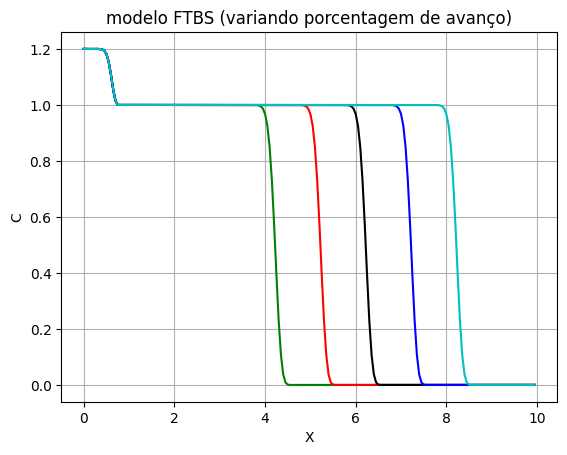

In [37]:
QsItr = []
xItr = []
for porcAvan in porcAvans:
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'modelo FTBS (variando porcentagem de avanço)')
for porcAvan in porcAvans:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Testes de variação específica do código

### Teste de variação da vazão de Injeção
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$
- $cItr = varia$

In [38]:
u = 0.25
ca = 1.0
cb = 0.0
lXs = 10.0
tTotal = 5
deltX = 0.05
porcAvans = 1/2
cInjItrs = 1.2*np.array([0.6,0.8,1.0,1.2,1.4])
# percentual de como os volumes estam preenchidos

In [39]:
def metodoExManipulado(u,ca,cb,lX,tTotal,deltX,porcAvan, cItr):
    # definicao do numero de volumes
    nx = int(lX/deltX)
    print(f'numero de volumes: {nx}')
    # definicao deltaT e passos de tempo
    # Considerando a condição de tempo do qual o método é estável
    deltT = 0.8*(1 /((u/deltX)))
    n = int(tTotal/deltT)
    print(f'valor passo de tempo deltaT: {deltT}')
    print(f'numero de passos de tempo: {n}')
    # inicializando o vetor considerando as condicoes de contorno
    qInit = []
    for i in range(nx):
        if i < int(nx*porcAvan):
            qInit.append(ca)
        if i >= int(nx*porcAvan):
            qInit.append(cb)
    # inicia o c iterativo
    #---------------------
    cItr = ca
    qFinal = qInit
    espaco = [0.0]
    for k in range(nx-1):
        espaco.append(espaco[k] + deltX)
    for i in range(n):
        qItr = []
        #-----------------
        #definição de mudança de vazão
        if i >= n/2:
            cItr = ca*cInjItr
        q0 = 2*cItr - qFinal[0]
        for j in range(nx):
            if j == 0:
                qItr.append(
                    qFinal[j] - (deltT/deltX)*
                    (u*(qFinal[j]-q0)))
            elif j == nx-1:
                qItr.append(qFinal[j] - (deltT/deltX)*
                            (u*(qFinal[j]-qFinal[j-1])))
            else:
                qItr.append(qFinal[j] - (deltT/deltX)*
                            (u*(qFinal[j]-qFinal[j-1])))
        qFinal = qItr
    return espaco, qFinal
    

numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31


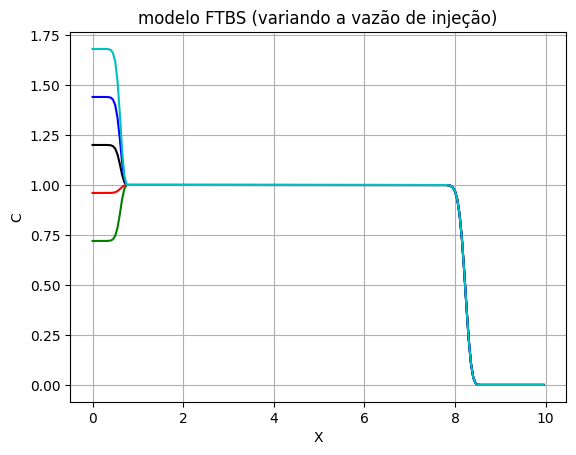

In [40]:
QsItr = []
xItr = []
for cInjItr in cInjItrs:
    x, Qs = metodoExManipulado(u,ca,cb,lX,tTotal,deltX,porcAvan, cInjItr)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'modelo FTBS (variando a vazão de injeção)')
for cInjItr in cInjItrs:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

### Teste de variação de deltaT forçados
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$
- $\Delta t = 0,012$

In [41]:
u = 0.25
ca = 1.0
cb = 0.0
lXs = 10.0
tTotal = 5
deltX = 0.05
porcAvans = 1/2
deltTs = 0.0116*np.array([0.8,1.0,2.0])
# percentual de como os volumes estam preenchidos

In [42]:
def metodoExManipulado(u,ca,cb,lX,tTotal,deltX,porcAvan, deltT):
    # definicao do numero de volumes
    nx = int(lX/deltX)
    print(f'numero de volumes: {nx}')
    # definicao deltaT e passos de tempo
    # Considerando a condição de tempo do qual o método é estável
    #deltT = 0.9*(1 /((u/deltX)))
    n = int(tTotal/deltT)
    print(f'valor passo de tempo deltaT: {deltT}')
    print(f'numero de passos de tempo: {n}')
    # inicializando o vetor considerando as condicoes de contorno
    qInit = []
    for i in range(nx):
        if i < int(nx*porcAvan):
            qInit.append(ca)
        if i >= int(nx*porcAvan):
            qInit.append(cb)
    # inicia o c iterativo
    #---------------------
    cItr = ca
    qFinal = qInit
    espaco = [0.0]
    for k in range(nx-1):
        espaco.append(espaco[k] + deltX)
    for i in range(n):
        qItr = []
        #-----------------
        #definição de mudança de vazão
        if i >= n/2:
            cItr = ca*1.2
        q0 = 2*cItr - qFinal[0]
        for j in range(nx):
            if j == 0:
                qItr.append(
                    qFinal[j] - (deltT/deltX)*
                    (u*(qFinal[j]-q0)))
            elif j == nx-1:
                qItr.append(qFinal[j] - (deltT/deltX)*
                            (u*(qFinal[j]-qFinal[j-1])))
            else:
                qItr.append(qFinal[j] - (deltT/deltX)*
                            (u*(qFinal[j]-qFinal[j-1])))
        qFinal = qItr
    return espaco, qFinal
    

numero de volumes: 200
valor passo de tempo deltaT: 0.00928
numero de passos de tempo: 538
numero de volumes: 200
valor passo de tempo deltaT: 0.0116
numero de passos de tempo: 431
numero de volumes: 200
valor passo de tempo deltaT: 0.0232
numero de passos de tempo: 215


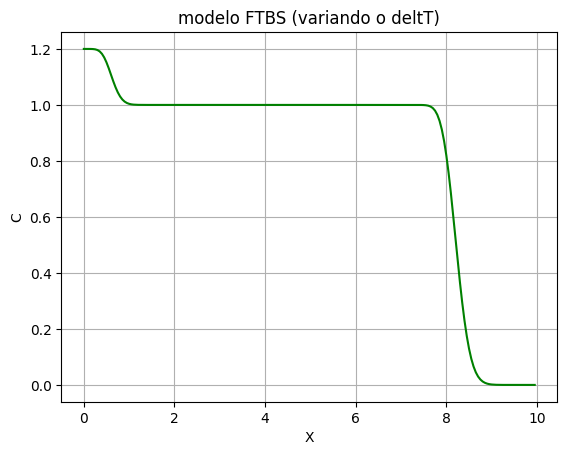

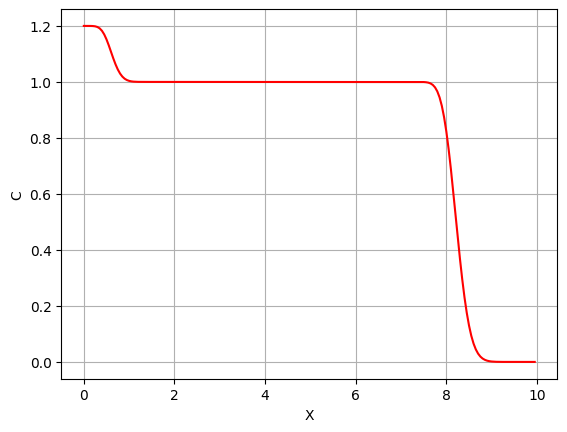

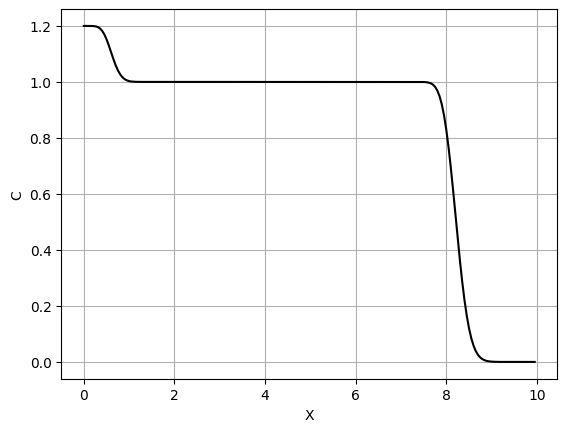

In [43]:
QsItr = []
xItr = []
for deltT in deltTs:
    x, Qs = metodoExManipulado(u,ca,cb,lX,tTotal,deltX,porcAvan, deltT)
    xItr.append(x)
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'modelo FTBS (variando o deltT)')
for deltT in deltTs:
    plt.plot(xItr[i],QsItr[i], color = colors[i])
    i+=1
    plt.xlabel('X')
    plt.ylabel('C')
    plt.grid()
    plt.show()

### Lax-Friedrichs

## Dados do problema
- $u = 0.25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

Inicializando a variáveis

In [44]:
u = 0.25
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltX = 0.05
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

In [45]:
def metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan):
    # definicao do numero de volumes
    nx = int(lX/deltX)
    print(f'numero de volumes: {nx}')
    # definicao deltaT e passos de tempo
    # Considerando a condição de tempo do qual o método é estável
    deltT = 0.2*(1 /((u/deltX)))
    n = int(tTotal/deltT)
    print(f'valor passo de tempo deltaT: {deltT}')
    print(f'numero de passos de tempo: {n}')
    # inicializando o vetor considerando as condicoes de contorno
    qInit = []
    for i in range(nx):
        if i < int(nx*porcAvan):
            qInit.append(ca)
        if i >= int(nx*porcAvan):
            qInit.append(cb)
    # inicia o c iterativo
    #---------------------
    cItr = ca
    qFinal = qInit
    espaco = [0.0]
    for k in range(nx-1):
        espaco.append(espaco[k] + deltX)
    for i in range(n):
        qItr = []
        #-----------------
        #definição de mudança de vazão
        if i >= n/2:
            cItr = ca*1.2
        q0 = 2*cItr - qFinal[0]
        for j in range(nx):
            if j == 0:
                qItr.append(
                    ((qFinal[j+1] + q0)/2) - (deltT/deltX)*
                    (u*(qFinal[j+1]-q0)))
            elif j == nx-1:
                qItr.append(((qFinal[j] + qFinal[j-1])/2) - (deltT/deltX)*
                            (u*(qFinal[j]-qFinal[j-1])))
            else:
                qItr.append(((qFinal[j+1] + qFinal[j-1])/2) - (deltT/deltX)*
                            (u*(qFinal[j+1]-qFinal[j-1])))
        qFinal = qItr
    return espaco, qFinal
    

In [46]:
x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)

numero de volumes: 200
valor passo de tempo deltaT: 0.04000000000000001
numero de passos de tempo: 124


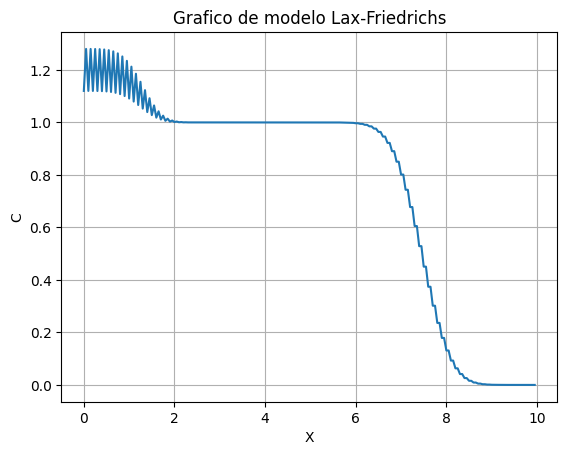

In [47]:
plt.figure()
plt.title(f'Grafico de modelo Lax-Friedrichs')
plt.plot(x,Qs)
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Teste variação da velocidade de advecção
- $u = varia$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

In [48]:
us = 0.25*np.array([0.6,0.8,1.0,1.2,1.4])
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltX = 0.05
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

numero de volumes: 200
valor passo de tempo deltaT: 0.06666666666666668
numero de passos de tempo: 74
numero de volumes: 200
valor passo de tempo deltaT: 0.05
numero de passos de tempo: 100
numero de volumes: 200
valor passo de tempo deltaT: 0.04000000000000001
numero de passos de tempo: 124
numero de volumes: 200
valor passo de tempo deltaT: 0.03333333333333334
numero de passos de tempo: 149
numero de volumes: 200
valor passo de tempo deltaT: 0.028571428571428577
numero de passos de tempo: 174


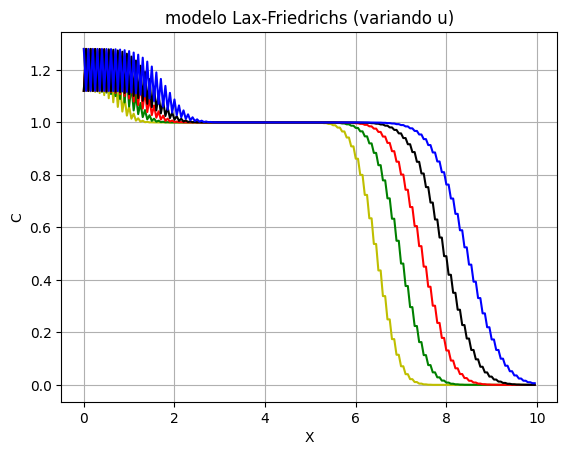

In [49]:
QsItr = []
xItr = []
for u in us:
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['y','g','r','k','b','c']
plt.title(f'modelo Lax-Friedrichs (variando u)')
for u in us:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Teste variação do Lx
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = varia$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

In [50]:
u = 0.25
ca = 1.0
cb = 0.0
lXs = 10.0*np.array([0.6,0.8,1.0,1.2,1.4])
tTotal = 5
deltX = 0.05
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

numero de volumes: 120
valor passo de tempo deltaT: 0.04000000000000001
numero de passos de tempo: 124
numero de volumes: 160
valor passo de tempo deltaT: 0.04000000000000001
numero de passos de tempo: 124
numero de volumes: 200
valor passo de tempo deltaT: 0.04000000000000001
numero de passos de tempo: 124
numero de volumes: 240
valor passo de tempo deltaT: 0.04000000000000001
numero de passos de tempo: 124
numero de volumes: 280
valor passo de tempo deltaT: 0.04000000000000001
numero de passos de tempo: 124


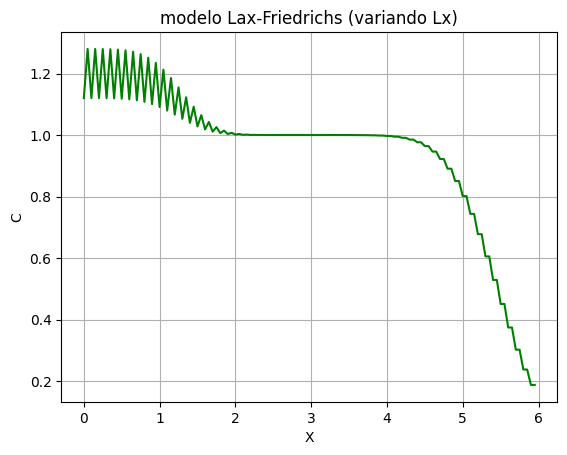

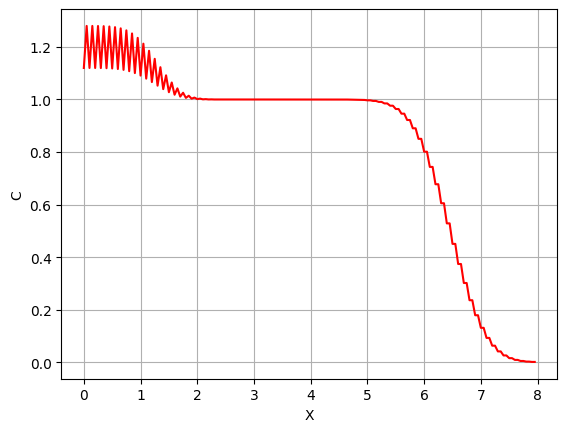

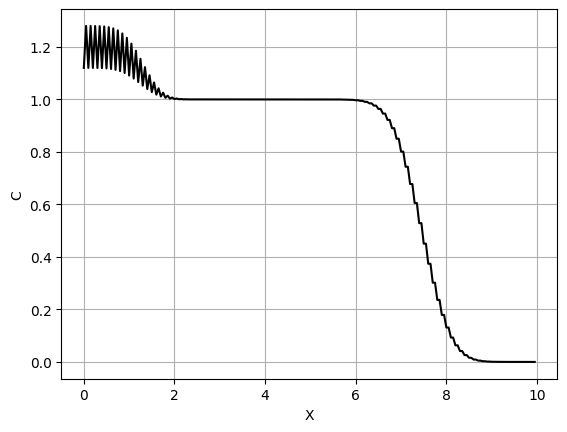

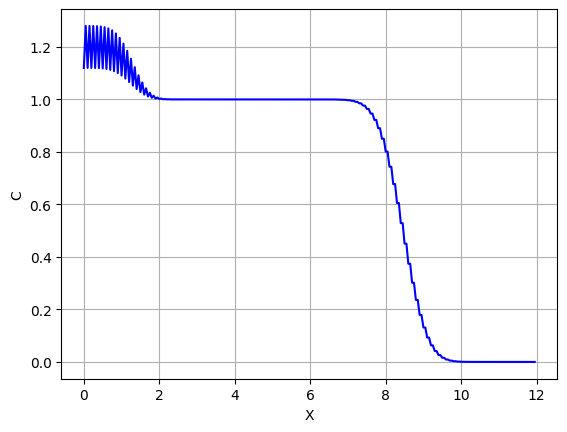

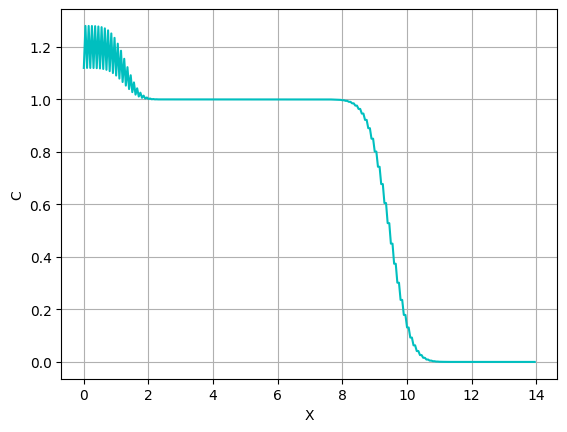

In [51]:
QsItr = []
xItr = []
for lX in lXs:
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr.append(x)
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'modelo Lax-Friedrichs (variando Lx)')

for lX in lXs:
    plt.plot(xItr[i],QsItr[i], color = colors[i])
    plt.xlabel('X')
    plt.ylabel('C')
    plt.grid()
    plt.show()
    i+=1

## Teste variação do tempo totalX
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = varia$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

In [52]:
u = 0.25
ca = 1.0
cb = 0.0
lX = 10.0
tTotals = 5*np.array([0.6,0.8,1.0,1.2,1.4])
deltX = 0.05
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

numero de volumes: 200
valor passo de tempo deltaT: 0.04000000000000001
numero de passos de tempo: 74
numero de volumes: 200
valor passo de tempo deltaT: 0.04000000000000001
numero de passos de tempo: 99
numero de volumes: 200
valor passo de tempo deltaT: 0.04000000000000001
numero de passos de tempo: 124
numero de volumes: 200
valor passo de tempo deltaT: 0.04000000000000001
numero de passos de tempo: 149
numero de volumes: 200
valor passo de tempo deltaT: 0.04000000000000001
numero de passos de tempo: 174


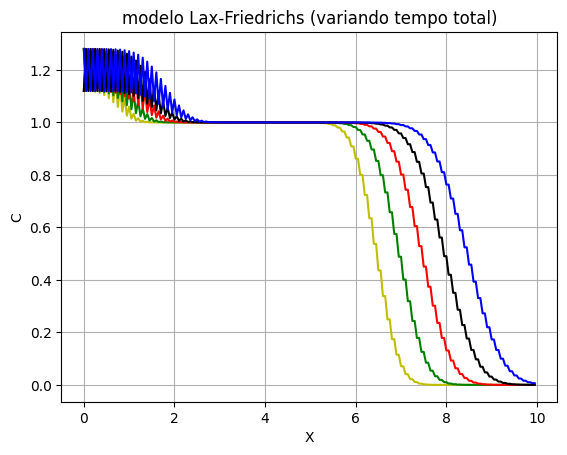

In [53]:
QsItr = []
xItr = []
for tTotal in tTotals:
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['y','g','r','k','b','c']
plt.title(f'modelo Lax-Friedrichs (variando tempo total)')
for tTotal in tTotals:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Teste variação de deltaX
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = varia$
- $\%\ de\ avanço = 1/2$

In [54]:
u = 0.25
ca = 1.0
cb = 0.0
lXs = 10.0
tTotal = 5
deltXs = 0.05*np.array([0.6,0.8,1.0,1.2,1.4])
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

numero de volumes: 333
valor passo de tempo deltaT: 0.024
numero de passos de tempo: 208
Tempo de execucao: 0.04760122299194336 segundos
numero de volumes: 249
valor passo de tempo deltaT: 0.03200000000000001
numero de passos de tempo: 156
Tempo de execucao: 0.031455039978027344 segundos
numero de volumes: 200
valor passo de tempo deltaT: 0.04000000000000001
numero de passos de tempo: 124
Tempo de execucao: 0.01308298110961914 segundos
numero de volumes: 166
valor passo de tempo deltaT: 0.048
numero de passos de tempo: 104
Tempo de execucao: 0.009864091873168945 segundos
numero de volumes: 142
valor passo de tempo deltaT: 0.055999999999999994
numero de passos de tempo: 89
Tempo de execucao: 0.006322145462036133 segundos


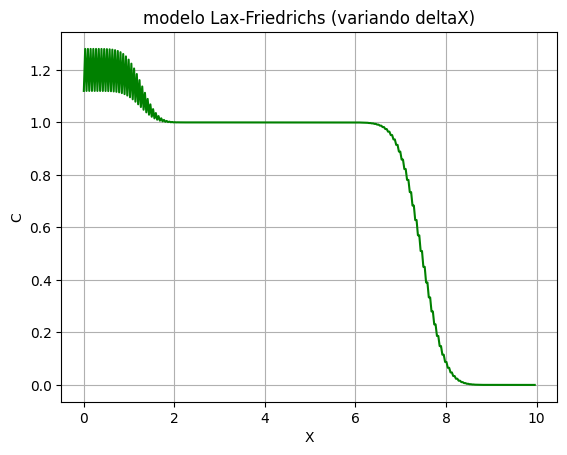

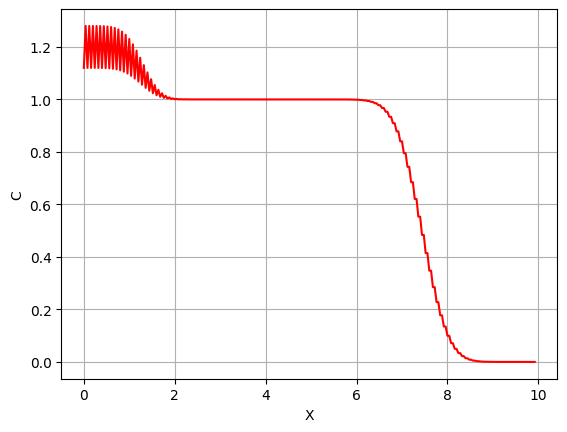

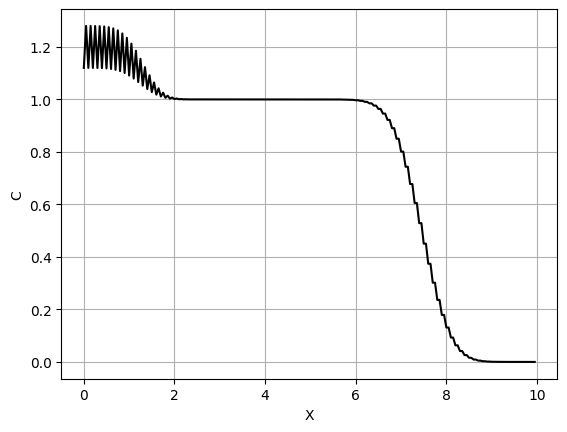

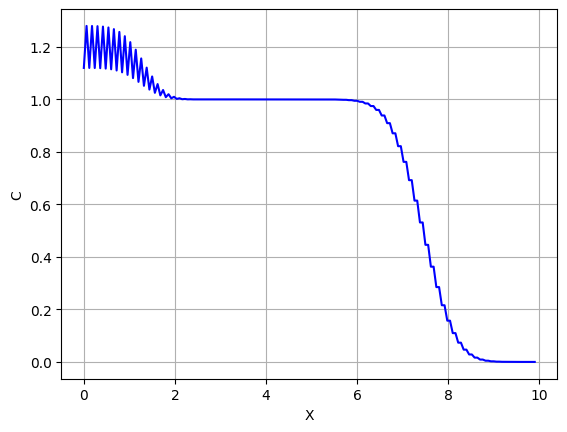

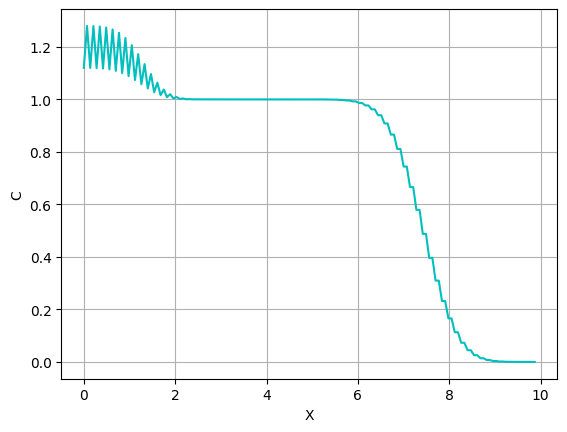

In [55]:
QsItr = []
xItr = []
for deltX in deltXs:
    start_time = time.time()
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr.append(x)
    QsItr.append(Qs)
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Tempo de execucao: {elapsed_time} segundos")
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'modelo Lax-Friedrichs (variando deltaX)')

for deltX in deltXs:
    plt.plot(xItr[i],QsItr[i], color = colors[i])
    plt.xlabel('X')
    plt.ylabel('C')
    plt.grid()
    plt.show()
    i+=1

## Teste variação da porcentagem de avanço
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = varia$

In [56]:
u = 0.25
ca = 1.0
cb = 0.0
lXs = 10.0
tTotal = 5
deltX = 0.05
porcAvans = 1/2*np.array([0.6,0.8,1.0,1.2,1.4])
# percentual de como os volumes estam preenchidos

numero de volumes: 200
valor passo de tempo deltaT: 0.04000000000000001
numero de passos de tempo: 124
numero de volumes: 200
valor passo de tempo deltaT: 0.04000000000000001
numero de passos de tempo: 124
numero de volumes: 200
valor passo de tempo deltaT: 0.04000000000000001
numero de passos de tempo: 124
numero de volumes: 200
valor passo de tempo deltaT: 0.04000000000000001
numero de passos de tempo: 124
numero de volumes: 200
valor passo de tempo deltaT: 0.04000000000000001
numero de passos de tempo: 124


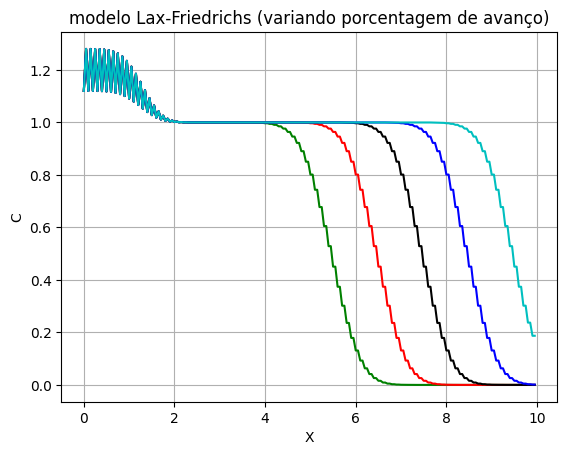

In [57]:
QsItr = []
xItr = []
for porcAvan in porcAvans:
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'modelo Lax-Friedrichs (variando porcentagem de avanço)')
for porcAvan in porcAvans:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Testes de variação específica do código

### Teste de variação da vazão de Injeção
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$
- $cItr = varia$

In [58]:
u = 0.25
ca = 1.0
cb = 0.0
lXs = 10.0
tTotal = 5
deltX = 0.05
porcAvans = 1/2
cInjItrs = 1.0*np.array([0.6,0.8,1.0,1.2,1.4])
# percentual de como os volumes estam preenchidos

In [59]:
def metodoExManipulado(u,ca,cb,lX,tTotal,deltX,porcAvan, cItr):
    # definicao do numero de volumes
    nx = int(lX/deltX)
    print(f'numero de volumes: {nx}')
    # definicao deltaT e passos de tempo
    # Considerando a condição de tempo do qual o método é estável
    deltT = 0.2*(1 /((u/deltX) + (2*alpha/(deltX**2))))
    n = int(tTotal/deltT)
    print(f'valor passo de tempo deltaT: {deltT}')
    print(f'numero de passos de tempo: {n}')
    # inicializando o vetor considerando as condicoes de contorno
    qInit = []
    for i in range(nx):
        if i < int(nx*porcAvan):
            qInit.append(ca)
        if i >= int(nx*porcAvan):
            qInit.append(cb)
    # inicia o c iterativo
    #---------------------
    cItr = ca
    qFinal = qInit
    espaco = [0.0]
    for k in range(nx-1):
        espaco.append(espaco[k] + deltX)
    for i in range(n):
        qItr = []
        #-----------------
        #definição de mudança de vazão
        if i >= n/2:
            cItr = ca*cInjItr
        q0 = 2*cItr - qFinal[0]
        for j in range(nx):
            if j == 0:
                qItr.append(
                    ((qFinal[j+1] + q0)/2) - (deltT/deltX)*
                    (u*(qFinal[j+1]-q0)))
            elif j == nx-1:
                qItr.append(((qFinal[j] + qFinal[j-1])/2) - (deltT/deltX)*
                            (u*(qFinal[j]-qFinal[j-1])))
            else:
                qItr.append(((qFinal[j+1] + qFinal[j-1])/2) - (deltT/deltX)*
                            (u*(qFinal[j+1]-qFinal[j-1])))
        qFinal = qItr
    return espaco, qFinal
    

numero de volumes: 200
valor passo de tempo deltaT: 0.002352941176470589
numero de passos de tempo: 2124
numero de volumes: 200
valor passo de tempo deltaT: 0.002352941176470589
numero de passos de tempo: 2124
numero de volumes: 200
valor passo de tempo deltaT: 0.002352941176470589
numero de passos de tempo: 2124
numero de volumes: 200
valor passo de tempo deltaT: 0.002352941176470589
numero de passos de tempo: 2124
numero de volumes: 200
valor passo de tempo deltaT: 0.002352941176470589
numero de passos de tempo: 2124


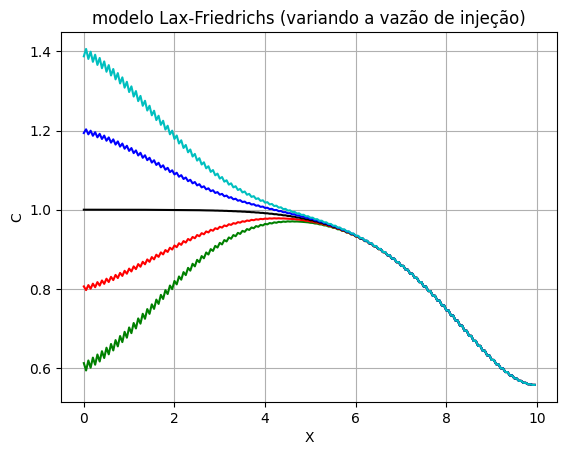

In [60]:
QsItr = []
xItr = []
for cInjItr in cInjItrs:
    x, Qs = metodoExManipulado(u,ca,cb,lX,tTotal,deltX,porcAvan, cInjItr)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'modelo Lax-Friedrichs (variando a vazão de injeção)')
for cInjItr in cInjItrs:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

### Teste de variação de deltaT forçados
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$
- $\Delta t = 0,012$

In [61]:
u = 0.25
ca = 1.0
cb = 0.0
lXs = 10.0
tTotal = 5
deltX = 0.05
porcAvans = 1/2
deltTs = 0.0116*np.array([0.5,1.0,1.5])
# percentual de como os volumes estam preenchidos

In [62]:
def metodoExManipulado(u,ca,cb,lX,tTotal,deltX,porcAvan, deltT):
    # definicao do numero de volumes
    nx = int(lX/deltX)
    print(f'numero de volumes: {nx}')
    n = int(tTotal/deltT)
    print(f'valor passo de tempo deltaT: {deltT}')
    print(f'numero de passos de tempo: {n}')
    # inicializando o vetor considerando as condicoes de contorno
    qInit = []
    for i in range(nx):
        if i < int(nx*porcAvan):
            qInit.append(ca)
        if i >= int(nx*porcAvan):
            qInit.append(cb)
    # inicia o c iterativo
    #---------------------
    cItr = ca
    qFinal = qInit
    espaco = [0.0]
    for k in range(nx-1):
        espaco.append(espaco[k] + deltX)
    for i in range(n):
        qItr = []
        #-----------------
        #definição de mudança de vazão
        if i >= n/2:
            cItr = ca*1.2
        q0 = 2*cItr - qFinal[0]
        for j in range(nx):
            if j == 0:
                qItr.append(
                    ((qFinal[j+1] + q0)/2) - (deltT/deltX)*
                    (u*(qFinal[j+1]-q0)))
            elif j == nx-1:
                qItr.append(((qFinal[j] + qFinal[j-1])/2) - (deltT/deltX)*
                            (u*(qFinal[j]-qFinal[j-1])))
            else:
                qItr.append(((qFinal[j+1] + qFinal[j-1])/2) - (deltT/deltX)*
                            (u*(qFinal[j+1]-qFinal[j-1])))
        qFinal = qItr
    return espaco, qFinal
    

numero de volumes: 200
valor passo de tempo deltaT: 0.0058
numero de passos de tempo: 862
numero de volumes: 200
valor passo de tempo deltaT: 0.0116
numero de passos de tempo: 431
numero de volumes: 200
valor passo de tempo deltaT: 0.0174
numero de passos de tempo: 287


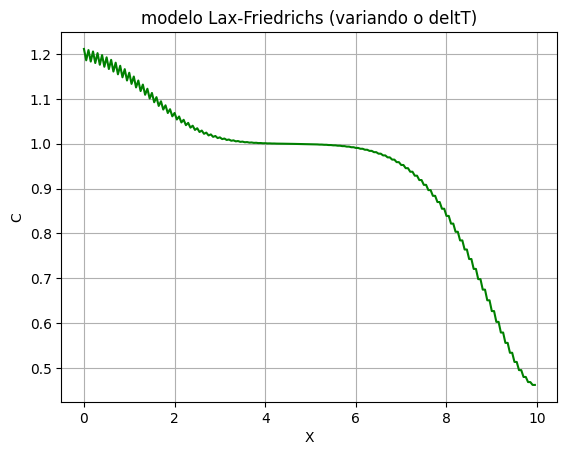

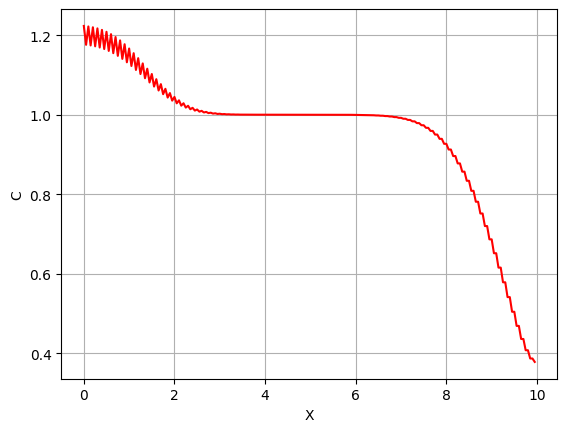

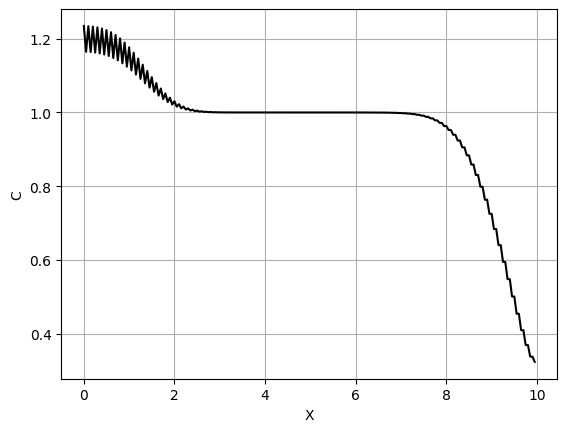

In [63]:
QsItr = []
xItr = []
for deltT in deltTs:
    x, Qs = metodoExManipulado(u,ca,cb,lX,tTotal,deltX,porcAvan, deltT)
    xItr.append(x)
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'modelo Lax-Friedrichs (variando o deltT)')
for deltT in deltTs:
    plt.plot(xItr[i],QsItr[i], color = colors[i])
    i+=1
    plt.xlabel('X')
    plt.ylabel('C')
    plt.grid()
    plt.show()

### Lax-Wendroff

## Dados do problema
- $u = 0.25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

Inicializando a variáveis

In [64]:
u = 0.25
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltX = 0.05
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

In [65]:
def metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan):
    # definicao do numero de volumes
    nx = int(lX/deltX)
    print(f'numero de volumes: {nx}')
    # definicao deltaT e passos de tempo
    # Considerando a condição de tempo do qual o método é estável
    deltT = 0.01*(0.1/((u/deltX)))
    n = int(tTotal/deltT)
    print(f'valor passo de tempo deltaT: {deltT}')
    print(f'numero de passos de tempo: {n}')
    # inicializando o vetor considerando as condicoes de contorno
    qInit = []
    for i in range(nx):
        if i < int(nx*porcAvan):
            qInit.append(ca)
        if i >= int(nx*porcAvan):
            qInit.append(cb)
    # inicia o c iterativo
    #---------------------
    cItr = ca
    qFinal = qInit
    espaco = [0.0]
    for k in range(nx-1):
        espaco.append(espaco[k] + deltX)
    for i in range(n):
        qItr = []
        #-----------------
        #definição de mudança de vazão
        if i >= n/2:
            cItr = ca*1.2
        q0 = 2*cItr - qFinal[0]
        for j in range(nx):
            if j == 0:
                qItr.append(
                    qFinal[j] - (deltT/deltX)*
                    (u*(qFinal[j+1]-q0)) + (deltT**2/(2*deltX**2))*
                    ((u**2)*(qFinal[j+1] -2*qFinal[j] + q0)))
            elif j == nx-1:
                qItr.append(
                    qFinal[j] - (deltT/deltX)*
                    (u*(qFinal[j]-qFinal[j-1])) + (deltT**2/(2*deltX**2))*
                    ((u**2)*(qFinal[j] -2*qFinal[j] + qFinal[j-1])))
            else:
                qItr.append(
                    qFinal[j] - (deltT/deltX)*
                    (u*(qFinal[j+1]-qFinal[j-1])) + (deltT**2/(2*deltX**2))*
                    ((u**2)*(qFinal[j+1] -2*qFinal[j] + qFinal[j-1])))
        qFinal = qItr
    return espaco, qFinal
    

In [66]:
x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)

numero de volumes: 200
valor passo de tempo deltaT: 0.0002
numero de passos de tempo: 25000


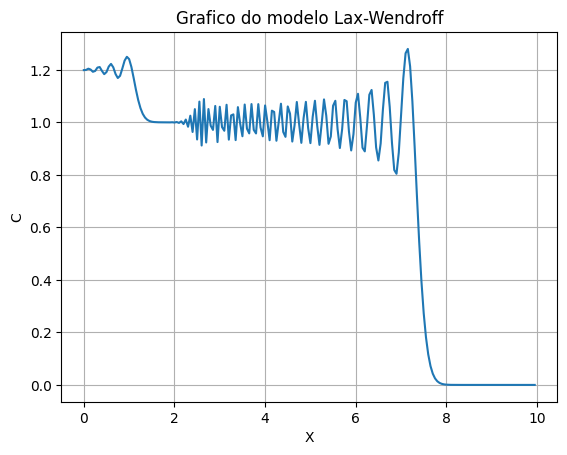

In [67]:
plt.figure()
plt.title(f'Grafico do modelo Lax-Wendroff')
plt.plot(x,Qs)
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Teste variação da velocidade de advecção
- $u = varia$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

In [68]:
us = 0.25*np.array([0.6,0.8,1.0,1.2,1.4])
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltX = 0.05
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

numero de volumes: 200
valor passo de tempo deltaT: 0.00033333333333333343
numero de passos de tempo: 14999
numero de volumes: 200
valor passo de tempo deltaT: 0.00025
numero de passos de tempo: 20000
numero de volumes: 200
valor passo de tempo deltaT: 0.0002
numero de passos de tempo: 25000
numero de volumes: 200
valor passo de tempo deltaT: 0.00016666666666666672
numero de passos de tempo: 29999
numero de volumes: 200
valor passo de tempo deltaT: 0.0001428571428571429
numero de passos de tempo: 34999


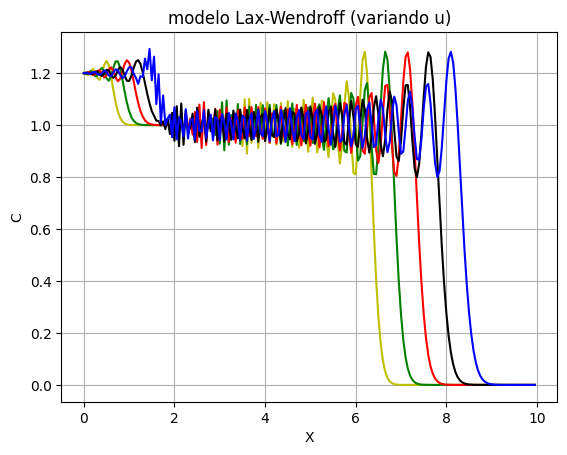

In [69]:
QsItr = []
xItr = []
for u in us:
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['y','g','r','k','b','c']
plt.title(f'modelo Lax-Wendroff (variando u)')
for u in us:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Teste variação do Lx
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = varia$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

In [70]:
u = 0.25
ca = 1.0
cb = 0.0
lXs = 10.0*np.array([0.6,0.8,1.0,1.2,1.4])
tTotal = 5
deltX = 0.05
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

numero de volumes: 120
valor passo de tempo deltaT: 0.0002
numero de passos de tempo: 25000
numero de volumes: 160
valor passo de tempo deltaT: 0.0002
numero de passos de tempo: 25000
numero de volumes: 200
valor passo de tempo deltaT: 0.0002
numero de passos de tempo: 25000
numero de volumes: 240
valor passo de tempo deltaT: 0.0002
numero de passos de tempo: 25000
numero de volumes: 280
valor passo de tempo deltaT: 0.0002
numero de passos de tempo: 25000


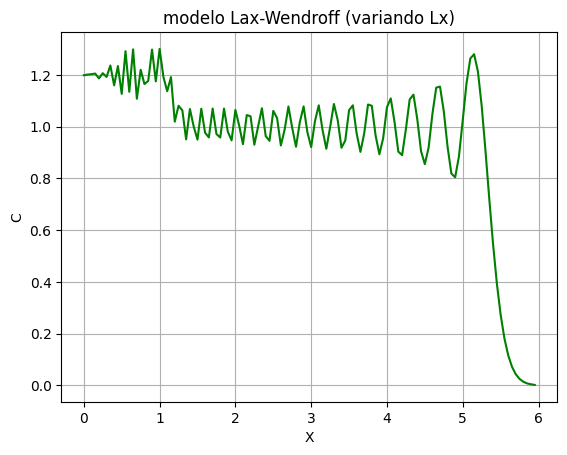

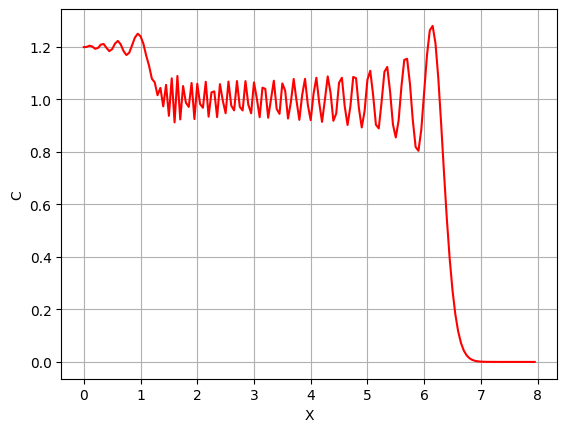

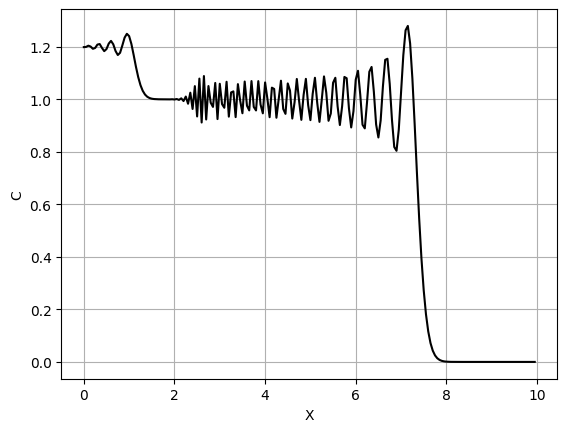

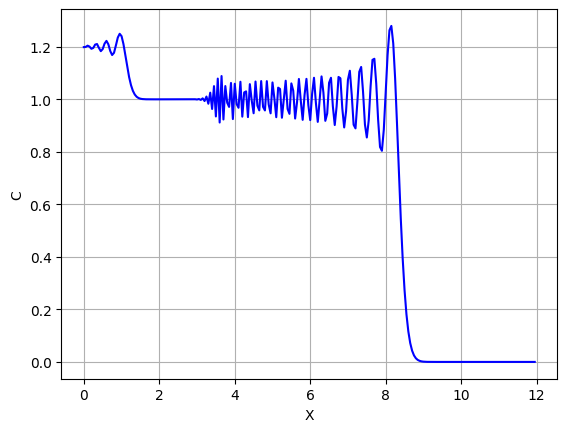

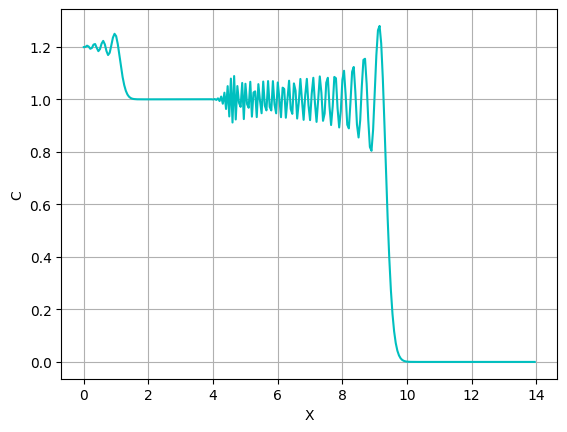

In [71]:
QsItr = []
xItr = []
for lX in lXs:
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr.append(x)
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'modelo Lax-Wendroff (variando Lx)')

for lX in lXs:
    plt.plot(xItr[i],QsItr[i], color = colors[i])
    plt.xlabel('X')
    plt.ylabel('C')
    plt.grid()
    plt.show()
    i+=1

## Teste variação do tempo totalX
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = varia$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

In [72]:
u = 0.25
ca = 1.0
cb = 0.0
lX = 10.0
tTotals = 5*np.array([0.6,0.8,1.0,1.2,1.4])
deltX = 0.05
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

numero de volumes: 200
valor passo de tempo deltaT: 0.0002
numero de passos de tempo: 15000
numero de volumes: 200
valor passo de tempo deltaT: 0.0002
numero de passos de tempo: 20000
numero de volumes: 200
valor passo de tempo deltaT: 0.0002
numero de passos de tempo: 25000
numero de volumes: 200
valor passo de tempo deltaT: 0.0002
numero de passos de tempo: 30000
numero de volumes: 200
valor passo de tempo deltaT: 0.0002
numero de passos de tempo: 35000


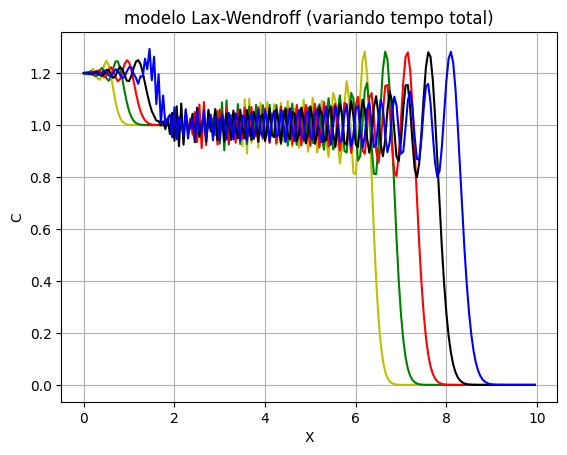

In [73]:
QsItr = []
xItr = []
for tTotal in tTotals:
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['y','g','r','k','b','c']
plt.title(f'modelo Lax-Wendroff (variando tempo total)')
for tTotal in tTotals:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Teste variação de deltaX
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = varia$
- $\%\ de\ avanço = 1/2$

In [74]:
u = 0.25
ca = 1.0
cb = 0.0
lXs = 10.0
tTotal = 5
deltXs = 0.05*np.array([0.6,0.8,1.0,1.2,1.4])
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

numero de volumes: 333
valor passo de tempo deltaT: 0.00012
numero de passos de tempo: 41666
Tempo de execucao: 15.772544622421265 segundos
numero de volumes: 249
valor passo de tempo deltaT: 0.00016000000000000004
numero de passos de tempo: 31249
Tempo de execucao: 8.42242169380188 segundos
numero de volumes: 200
valor passo de tempo deltaT: 0.0002
numero de passos de tempo: 25000
Tempo de execucao: 5.468709468841553 segundos
numero de volumes: 166
valor passo de tempo deltaT: 0.00024
numero de passos de tempo: 20833
Tempo de execucao: 3.888685464859009 segundos
numero de volumes: 142
valor passo de tempo deltaT: 0.00028000000000000003
numero de passos de tempo: 17857
Tempo de execucao: 2.8136465549468994 segundos


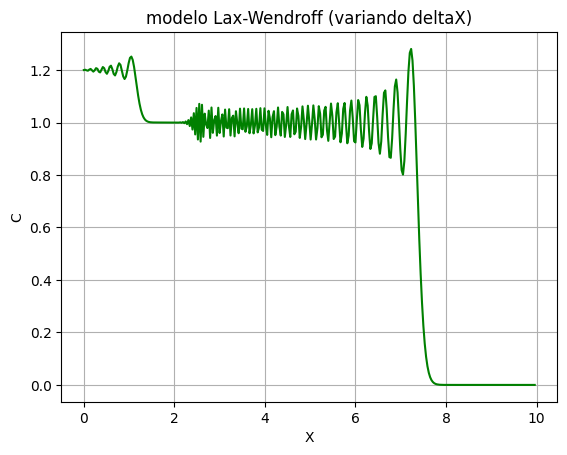

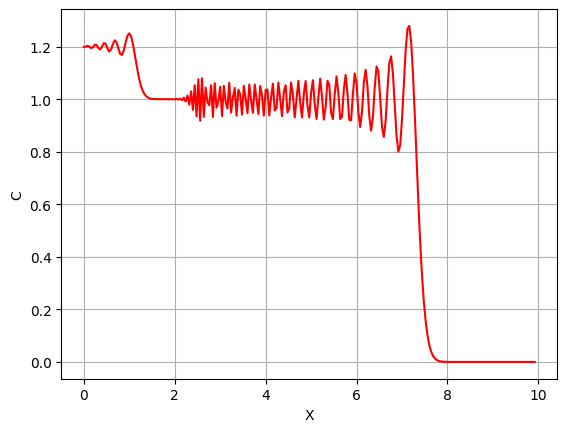

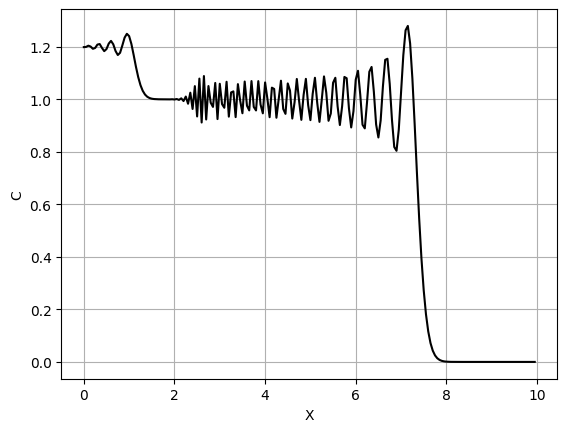

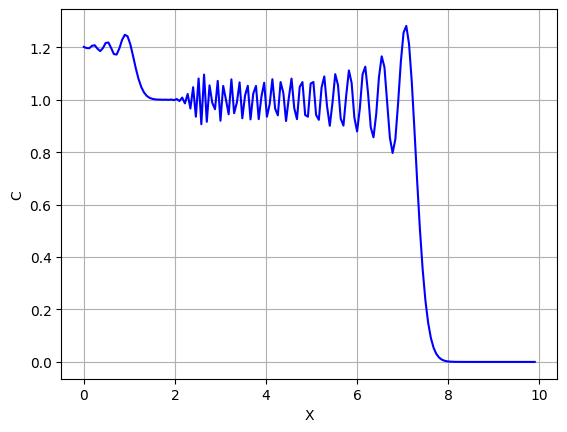

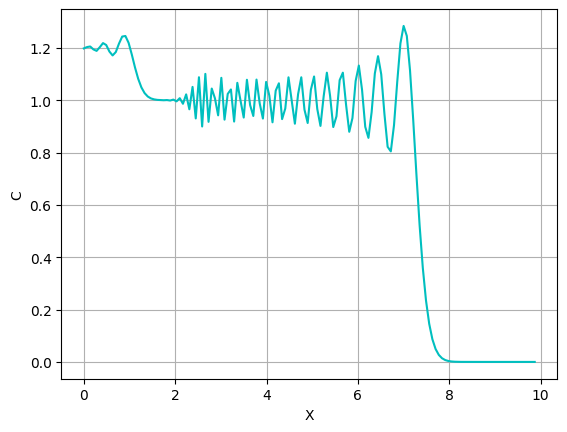

In [75]:
QsItr = []
xItr = []
for deltX in deltXs:
    start_time = time.time()
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr.append(x)
    QsItr.append(Qs)
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Tempo de execucao: {elapsed_time} segundos")
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'modelo Lax-Wendroff (variando deltaX)')

for deltX in deltXs:
    plt.plot(xItr[i],QsItr[i], color = colors[i])
    plt.xlabel('X')
    plt.ylabel('C')
    plt.grid()
    plt.show()
    i+=1

## Teste variação da porcentagem de avanço
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = varia$

In [76]:
u = 0.25
ca = 1.0
cb = 0.0
lXs = 10.0
tTotal = 5
deltX = 0.05
porcAvans = 1/2*np.array([0.6,0.8,1.0,1.2,1.4])
# percentual de como os volumes estam preenchidos

numero de volumes: 200
valor passo de tempo deltaT: 0.0002
numero de passos de tempo: 25000
numero de volumes: 200
valor passo de tempo deltaT: 0.0002
numero de passos de tempo: 25000
numero de volumes: 200
valor passo de tempo deltaT: 0.0002
numero de passos de tempo: 25000
numero de volumes: 200
valor passo de tempo deltaT: 0.0002
numero de passos de tempo: 25000
numero de volumes: 200
valor passo de tempo deltaT: 0.0002
numero de passos de tempo: 25000


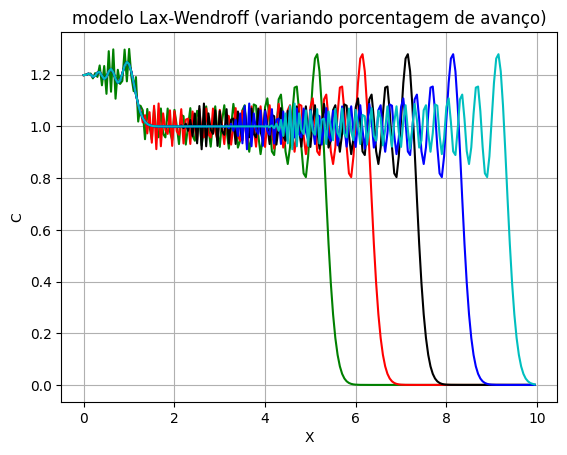

In [77]:
QsItr = []
xItr = []
for porcAvan in porcAvans:
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'modelo Lax-Wendroff (variando porcentagem de avanço)')
for porcAvan in porcAvans:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Testes de variação específica do código

### Teste de variação da vazão de Injeção
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$
- $cItr = varia$

In [78]:
u = 0.25
ca = 1.0
cb = 0.0
lXs = 10.0
tTotal = 5
deltX = 0.05
porcAvans = 1/2
cInjItrs = 1.0*np.array([0.6,0.8,1.0,1.2,1.4])
# percentual de como os volumes estam preenchidos

In [79]:
def metodoExManipulado(u,ca,cb,lX,tTotal,deltX,porcAvan, cItr):
    # definicao do numero de volumes
    nx = int(lX/deltX)
    print(f'numero de volumes: {nx}')
    # definicao deltaT e passos de tempo
    # Considerando a condição de tempo do qual o método é estável
    deltT = 0.9*(1 /((u/deltX) + (2*alpha/(deltX**2))))
    n = int(tTotal/deltT)
    print(f'valor passo de tempo deltaT: {deltT}')
    print(f'numero de passos de tempo: {n}')
    # inicializando o vetor considerando as condicoes de contorno
    qInit = []
    for i in range(nx):
        if i < int(nx*porcAvan):
            qInit.append(ca)
        if i >= int(nx*porcAvan):
            qInit.append(cb)
    # inicia o c iterativo
    #---------------------
    cItr = ca
    qFinal = qInit
    espaco = [0.0]
    for k in range(nx-1):
        espaco.append(espaco[k] + deltX)
    for i in range(n):
        qItr = []
        #-----------------
        #definição de mudança de vazão
        if i >= n/2:
            cItr = ca*cInjItr
        q0 = 2*cItr - qFinal[0]
        for j in range(nx):
            if j == 0:
                qItr.append(
                    qFinal[j] - (deltT/deltX)*
                    (u*(qFinal[j+1]-q0)) + (deltT**2/(2*deltX**2))*
                    ((u**2)*(qFinal[j+1] -2*qFinal[j] + q0)))
            elif j == nx-1:
                qItr.append(
                    qFinal[j] - (deltT/deltX)*
                    (u*(qFinal[j]-qFinal[j-1])) + (deltT**2/(2*deltX**2))*
                    ((u**2)*(qFinal[j] -2*qFinal[j] + qFinal[j-1])))
            else:
                qItr.append(
                    qFinal[j] - (deltT/deltX)*
                    (u*(qFinal[j+1]-qFinal[j-1])) + (deltT**2/(2*deltX**2))*
                    ((u**2)*(qFinal[j+1] -2*qFinal[j] + qFinal[j-1])))
        qFinal = qItr
    return espaco, qFinal
    

numero de volumes: 200
valor passo de tempo deltaT: 0.010588235294117648
numero de passos de tempo: 472
numero de volumes: 200
valor passo de tempo deltaT: 0.010588235294117648
numero de passos de tempo: 472
numero de volumes: 200
valor passo de tempo deltaT: 0.010588235294117648
numero de passos de tempo: 472
numero de volumes: 200
valor passo de tempo deltaT: 0.010588235294117648
numero de passos de tempo: 472
numero de volumes: 200
valor passo de tempo deltaT: 0.010588235294117648
numero de passos de tempo: 472


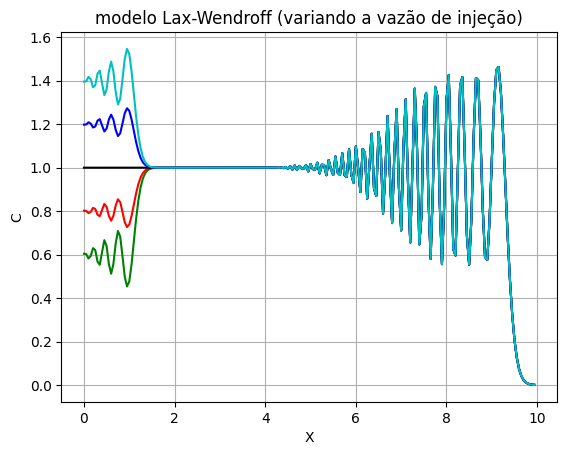

In [80]:
QsItr = []
xItr = []
for cInjItr in cInjItrs:
    x, Qs = metodoExManipulado(u,ca,cb,lX,tTotal,deltX,porcAvan, cInjItr)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'modelo Lax-Wendroff (variando a vazão de injeção)')
for cInjItr in cInjItrs:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

### Teste de variação de deltaT forçados
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$
- $\Delta t = 0,012$

In [81]:
u = 0.25
ca = 1.0
cb = 0.0
lXs = 10.0
tTotal = 5
deltX = 0.05
porcAvans = 1/2
deltTs = 0.0116*np.array([0.8,1.0,1.2])
# percentual de como os volumes estam preenchidos

In [82]:
def metodoExManipulado(u,ca,cb,lX,tTotal,deltX,porcAvan, deltT):
    # definicao do numero de volumes
    nx = int(lX/deltX)
    print(f'numero de volumes: {nx}')
    n = int(tTotal/deltT)
    print(f'valor passo de tempo deltaT: {deltT}')
    print(f'numero de passos de tempo: {n}')
    # inicializando o vetor considerando as condicoes de contorno
    qInit = []
    for i in range(nx):
        if i < int(nx*porcAvan):
            qInit.append(ca)
        if i >= int(nx*porcAvan):
            qInit.append(cb)
    # inicia o c iterativo
    #---------------------
    cItr = ca
    qFinal = qInit
    espaco = [0.0]
    for k in range(nx-1):
        espaco.append(espaco[k] + deltX)
    for i in range(n):
        qItr = []
        #-----------------
        #definição de mudança de vazão
        if i >= n/2:
            cItr = ca*1.2
        q0 = 2*cItr - qFinal[0]
        for j in range(nx):
            if j == 0:
                qItr.append(
                    qFinal[j] - (deltT/deltX)*
                    (u*(qFinal[j+1]-q0)) + (deltT**2/(2*deltX**2))*
                    ((u**2)*(qFinal[j+1] -2*qFinal[j] + q0)))
            elif j == nx-1:
                qItr.append(
                    qFinal[j] - (deltT/deltX)*
                    (u*(qFinal[j]-qFinal[j-1])) + (deltT**2/(2*deltX**2))*
                    ((u**2)*(qFinal[j] -2*qFinal[j] + qFinal[j-1])))
            else:
                qItr.append(
                    qFinal[j] - (deltT/deltX)*
                    (u*(qFinal[j+1]-qFinal[j-1])) + (deltT**2/(2*deltX**2))*
                    ((u**2)*(qFinal[j+1] -2*qFinal[j] + qFinal[j-1])))
        qFinal = qItr
    return espaco, qFinal
    

numero de volumes: 200
valor passo de tempo deltaT: 0.00928
numero de passos de tempo: 538
numero de volumes: 200
valor passo de tempo deltaT: 0.0116
numero de passos de tempo: 431
numero de volumes: 200
valor passo de tempo deltaT: 0.013919999999999998
numero de passos de tempo: 359


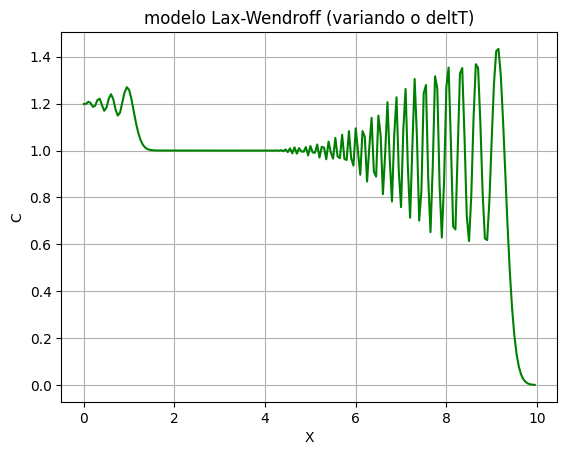

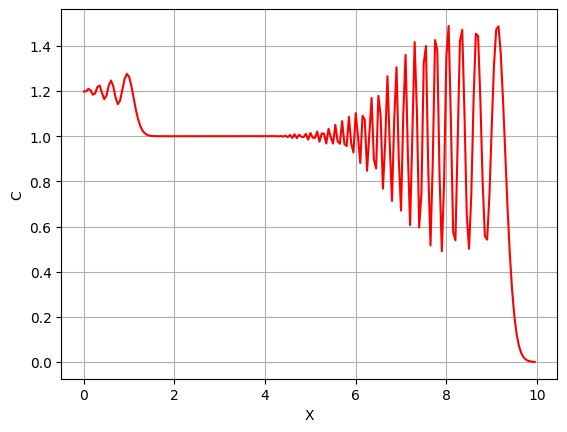

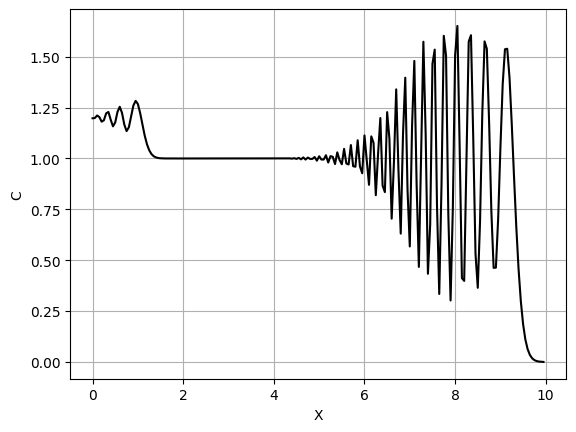

In [83]:
QsItr = []
xItr = []
for deltT in deltTs:
    x, Qs = metodoExManipulado(u,ca,cb,lX,tTotal,deltX,porcAvan, deltT)
    xItr.append(x)
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'modelo Lax-Wendroff (variando o deltT)')
for deltT in deltTs:
    plt.plot(xItr[i],QsItr[i], color = colors[i])
    i+=1
    plt.xlabel('X')
    plt.ylabel('C')
    plt.grid()
    plt.show()

### Beam-Warming

## Dados do problema
- $u = 0.25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

Inicializando a variáveis

In [84]:
u = 0.25
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltX = 0.05
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

In [85]:
def metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan):
    # definicao do numero de volumes
    nx = int(lX/deltX)
    print(f'numero de volumes: {nx}')
    # definicao deltaT e passos de tempo
    # Considerando a condição de tempo do qual o método é estável
    deltT = 0.5*(1 /((u/deltX)))
    n = int(tTotal/deltT)
    print(f'valor passo de tempo deltaT: {deltT}')
    print(f'numero de passos de tempo: {n}')
    # inicializando o vetor considerando as condicoes de contorno
    qInit = []
    for i in range(nx):
        if i < int(nx*porcAvan):
            qInit.append(ca)
        if i >= int(nx*porcAvan):
            qInit.append(cb)
    # inicia o c iterativo
    #---------------------
    cItr = ca
    qFinal = qInit
    espaco = [0.0]
    for k in range(nx-1):
        espaco.append(espaco[k] + deltX)
    for i in range(n):
        qItr = []
        #-----------------
        #definição de mudança de vazão
        if i >= n/2:
            cItr = ca*1.2
        q0 = 2*cItr - qFinal[0]
        for j in range(nx):
            if j == 0:
                qItr.append(
                    qFinal[j] - (deltT/deltX)*
                    (u*(qFinal[j]-q0)))
            elif j == 1:
                qItr.append(
                qFinal[j] - (deltT/(2*deltX))*
                    (u*(3*qFinal[j]-4*qFinal[j-1] +q0)) + (deltT**2/(2*deltX**2))*
                    ((u**2)*(qFinal[j] -2*qFinal[j-1] + q0)))
            else:
                qItr.append(
                qFinal[j] - (deltT/(2*deltX))*
                    (u*(3*qFinal[j]-4*qFinal[j-1] +qFinal[j-2])) + (deltT**2/(2*deltX**2))*
                    ((u**2)*(qFinal[j] -2*qFinal[j-1] + qFinal[j-2])))
        qFinal = qItr
    return espaco, qFinal
    

In [86]:
x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)

numero de volumes: 200
valor passo de tempo deltaT: 0.1
numero de passos de tempo: 50


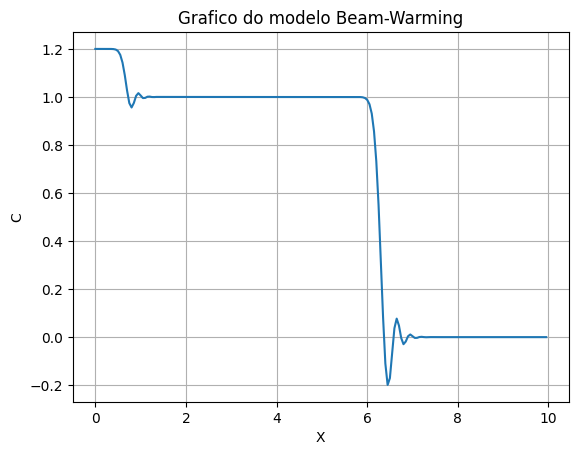

In [87]:
plt.figure()
plt.title(f'Grafico do modelo Beam-Warming')
plt.plot(x,Qs)
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Teste variação da velocidade de advecção
- $u = varia$
- $ \alpha = 0,1$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

In [88]:
us = 0.25*np.array([0.6,0.8,1.0,1.2,1.4])
alpha = 0.1
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltX = 0.05
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

numero de volumes: 200
valor passo de tempo deltaT: 0.16666666666666669
numero de passos de tempo: 29
numero de volumes: 200
valor passo de tempo deltaT: 0.125
numero de passos de tempo: 40
numero de volumes: 200
valor passo de tempo deltaT: 0.1
numero de passos de tempo: 50
numero de volumes: 200
valor passo de tempo deltaT: 0.08333333333333334
numero de passos de tempo: 59
numero de volumes: 200
valor passo de tempo deltaT: 0.07142857142857144
numero de passos de tempo: 69


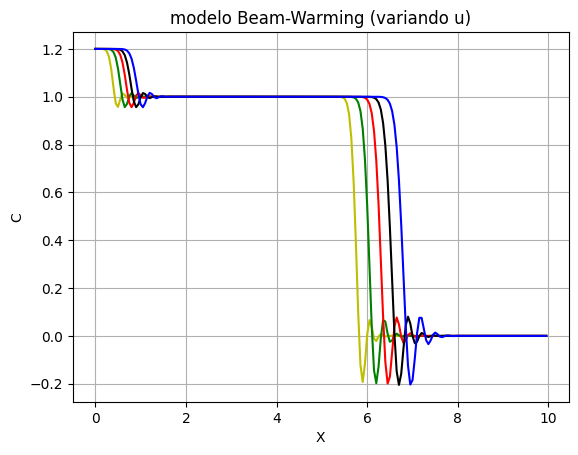

In [89]:
QsItr = []
xItr = []
for u in us:
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['y','g','r','k','b','c']
plt.title(f'modelo Beam-Warming (variando u)')
for u in us:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Teste variação do Lx
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = varia$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

In [90]:
u = 0.25
ca = 1.0
cb = 0.0
lXs = 10.0*np.array([0.6,0.8,1.0,1.2,1.4])
tTotal = 5
deltX = 0.05
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

numero de volumes: 120
valor passo de tempo deltaT: 0.1
numero de passos de tempo: 50
numero de volumes: 160
valor passo de tempo deltaT: 0.1
numero de passos de tempo: 50
numero de volumes: 200
valor passo de tempo deltaT: 0.1
numero de passos de tempo: 50
numero de volumes: 240
valor passo de tempo deltaT: 0.1
numero de passos de tempo: 50
numero de volumes: 280
valor passo de tempo deltaT: 0.1
numero de passos de tempo: 50


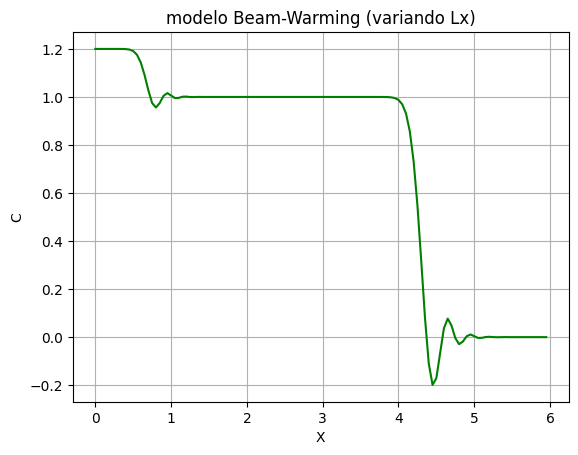

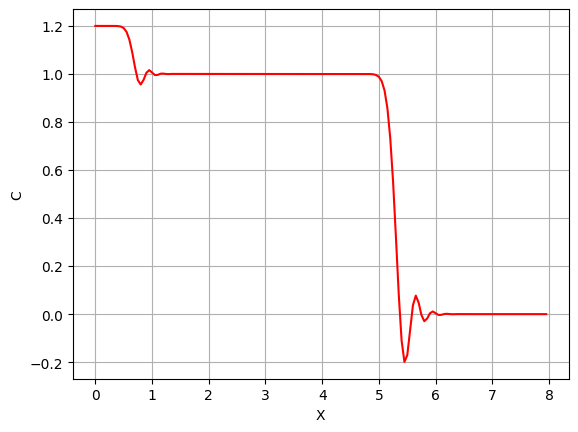

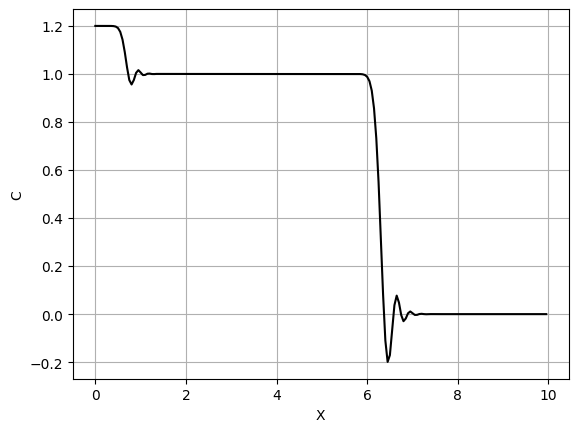

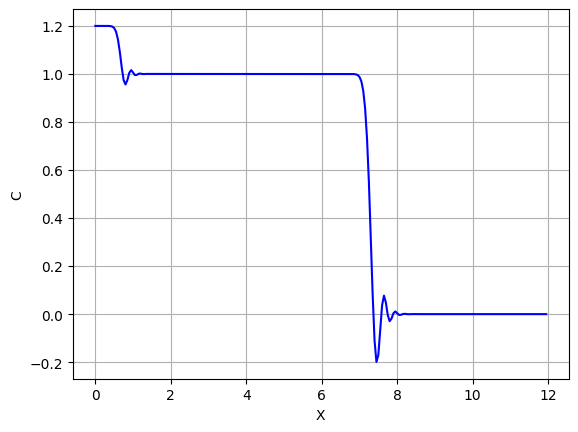

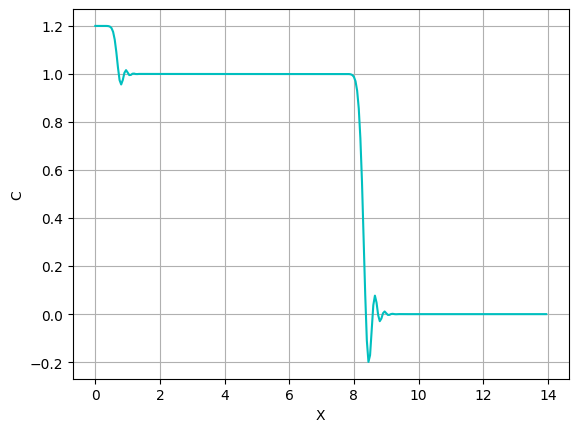

In [91]:
QsItr = []
xItr = []
for lX in lXs:
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr.append(x)
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'modelo Beam-Warming (variando Lx)')

for lX in lXs:
    plt.plot(xItr[i],QsItr[i], color = colors[i])
    plt.xlabel('X')
    plt.ylabel('C')
    plt.grid()
    plt.show()
    i+=1

## Teste variação do tempo totalX
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = varia$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

In [92]:
u = 0.25
ca = 1.0
cb = 0.0
lX = 10.0
tTotals = 5*np.array([0.6,0.8,1.0,1.2,1.4])
deltX = 0.05
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

numero de volumes: 200
valor passo de tempo deltaT: 0.1
numero de passos de tempo: 30
numero de volumes: 200
valor passo de tempo deltaT: 0.1
numero de passos de tempo: 40
numero de volumes: 200
valor passo de tempo deltaT: 0.1
numero de passos de tempo: 50
numero de volumes: 200
valor passo de tempo deltaT: 0.1
numero de passos de tempo: 60
numero de volumes: 200
valor passo de tempo deltaT: 0.1
numero de passos de tempo: 70


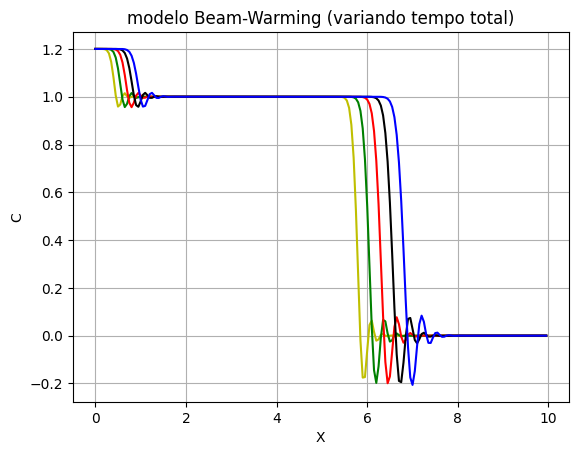

In [93]:
QsItr = []
xItr = []
for tTotal in tTotals:
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['y','g','r','k','b','c']
plt.title(f'modelo Beam-Warming (variando tempo total)')
for tTotal in tTotals:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Teste variação de deltaX
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = varia$
- $\%\ de\ avanço = 1/2$

In [94]:
u = 0.25
ca = 1.0
cb = 0.0
lXs = 10.0
tTotal = 5
deltXs = 0.05*np.array([0.6,0.8,1.0,1.2,1.4])
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

numero de volumes: 333
valor passo de tempo deltaT: 0.06
numero de passos de tempo: 83
Tempo de execucao: 0.05677914619445801 segundos
numero de volumes: 249
valor passo de tempo deltaT: 0.08000000000000002
numero de passos de tempo: 62
Tempo de execucao: 0.021329402923583984 segundos
numero de volumes: 200
valor passo de tempo deltaT: 0.1
numero de passos de tempo: 50
Tempo de execucao: 0.014131784439086914 segundos
numero de volumes: 166
valor passo de tempo deltaT: 0.12
numero de passos de tempo: 41
Tempo de execucao: 0.012089014053344727 segundos
numero de volumes: 142
valor passo de tempo deltaT: 0.13999999999999999
numero de passos de tempo: 35
Tempo de execucao: 0.009891986846923828 segundos


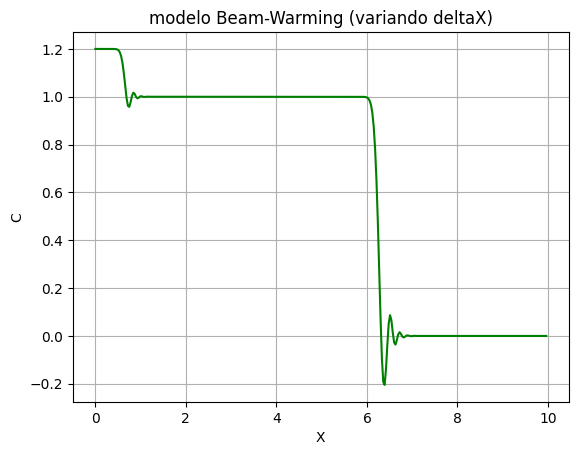

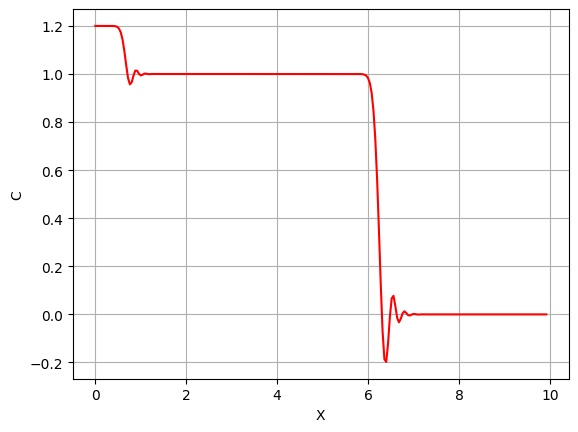

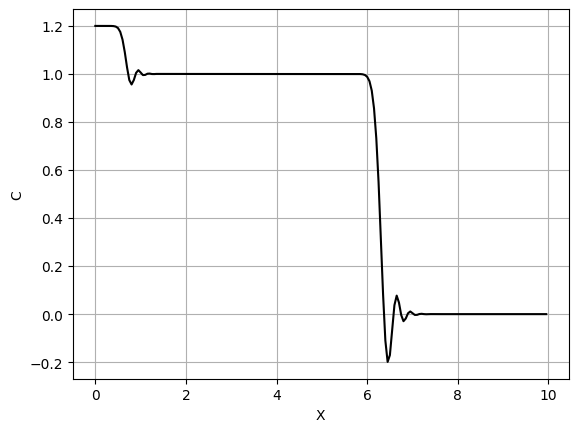

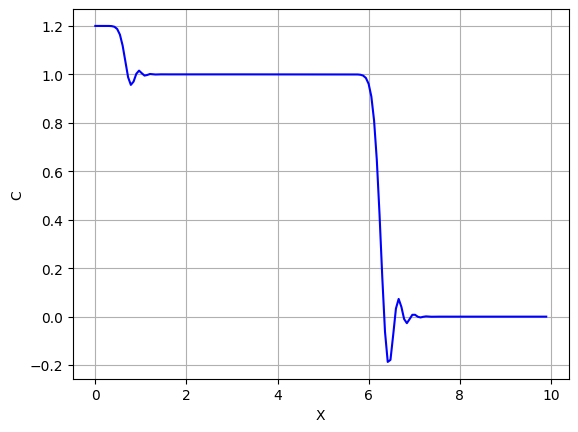

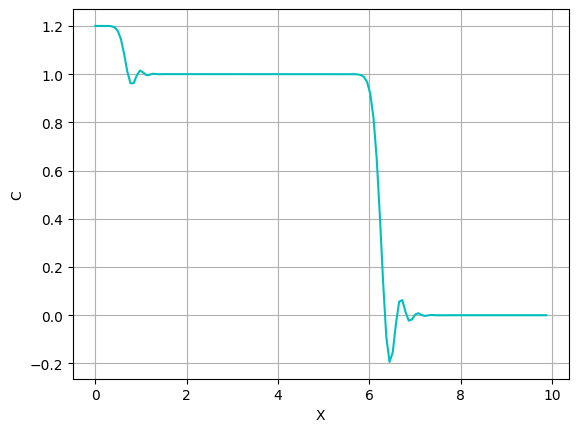

In [95]:
QsItr = []
xItr = []
for deltX in deltXs:
    start_time = time.time()
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr.append(x)
    QsItr.append(Qs)
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Tempo de execucao: {elapsed_time} segundos")
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'modelo Beam-Warming (variando deltaX)')

for deltX in deltXs:
    plt.plot(xItr[i],QsItr[i], color = colors[i])
    plt.xlabel('X')
    plt.ylabel('C')
    plt.grid()
    plt.show()
    i+=1

## Teste variação da porcentagem de avanço
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = varia$

In [96]:
u = 0.25
ca = 1.0
cb = 0.0
lXs = 10.0
tTotal = 5
deltX = 0.05
porcAvans = 1/2*np.array([0.6,0.8,1.0,1.2,1.4])
# percentual de como os volumes estam preenchidos

numero de volumes: 200
valor passo de tempo deltaT: 0.1
numero de passos de tempo: 50
numero de volumes: 200
valor passo de tempo deltaT: 0.1
numero de passos de tempo: 50
numero de volumes: 200
valor passo de tempo deltaT: 0.1
numero de passos de tempo: 50
numero de volumes: 200
valor passo de tempo deltaT: 0.1
numero de passos de tempo: 50
numero de volumes: 200
valor passo de tempo deltaT: 0.1
numero de passos de tempo: 50


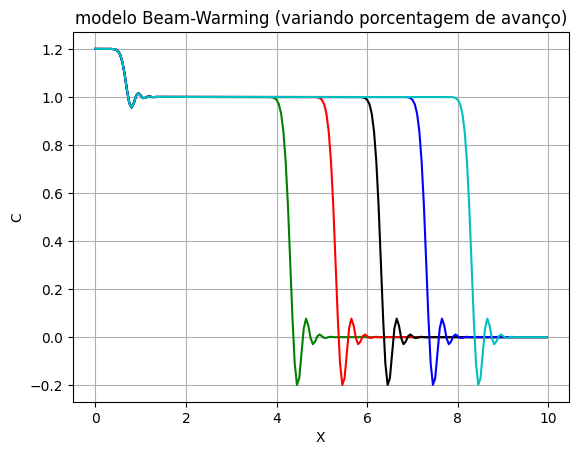

In [97]:
QsItr = []
xItr = []
for porcAvan in porcAvans:
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'modelo Beam-Warming (variando porcentagem de avanço)')
for porcAvan in porcAvans:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Testes de variação específica do código

### Teste de variação da vazão de Injeção
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$
- $cItr = varia$

In [98]:
u = 0.25
ca = 1.0
cb = 0.0
lXs = 10.0
tTotal = 5
deltX = 0.05
porcAvans = 1/2
cInjItrs = 1.0*np.array([0.6,0.8,1.0,1.2,1.4])
# percentual de como os volumes estam preenchidos

In [99]:
def metodoExManipulado(u,ca,cb,lX,tTotal,deltX,porcAvan, cItr):
    # definicao do numero de volumes
    nx = int(lX/deltX)
    print(f'numero de volumes: {nx}')
    # definicao deltaT e passos de tempo
    # Considerando a condição de tempo do qual o método é estável
    deltT = 0.9*(1 /((u/deltX) + (2*alpha/(deltX**2))))
    n = int(tTotal/deltT)
    print(f'valor passo de tempo deltaT: {deltT}')
    print(f'numero de passos de tempo: {n}')
    # inicializando o vetor considerando as condicoes de contorno
    qInit = []
    for i in range(nx):
        if i < int(nx*porcAvan):
            qInit.append(ca)
        if i >= int(nx*porcAvan):
            qInit.append(cb)
    # inicia o c iterativo
    #---------------------
    cItr = ca
    qFinal = qInit
    espaco = [0.0]
    for k in range(nx-1):
        espaco.append(espaco[k] + deltX)
    for i in range(n):
        qItr = []
        #-----------------
        #definição de mudança de vazão
        if i >= n/2:
            cItr = ca*cInjItr
        q0 = 2*cItr - qFinal[0]
        for j in range(nx):
            if j == 0:
                qItr.append(
                    qFinal[j] - (deltT/deltX)*
                    (u*(qFinal[j]-q0)))
            elif j == 1:
                qItr.append(
                qFinal[j] - (deltT/(2*deltX))*
                    (u*(3*qFinal[j]-4*qFinal[j-1] +q0)) + (deltT**2/(2*deltX**2))*
                    ((u**2)*(qFinal[j] -2*qFinal[j-1] + q0)))
            else:
                qItr.append(
                qFinal[j] - (deltT/(2*deltX))*
                    (u*(3*qFinal[j]-4*qFinal[j-1] +qFinal[j-2])) + (deltT**2/(2*deltX**2))*
                    ((u**2)*(qFinal[j] -2*qFinal[j-1] + qFinal[j-2])))
        qFinal = qItr
    return espaco, qFinal
    

numero de volumes: 200
valor passo de tempo deltaT: 0.010588235294117648
numero de passos de tempo: 472
numero de volumes: 200
valor passo de tempo deltaT: 0.010588235294117648
numero de passos de tempo: 472
numero de volumes: 200
valor passo de tempo deltaT: 0.010588235294117648
numero de passos de tempo: 472
numero de volumes: 200
valor passo de tempo deltaT: 0.010588235294117648
numero de passos de tempo: 472
numero de volumes: 200
valor passo de tempo deltaT: 0.010588235294117648
numero de passos de tempo: 472


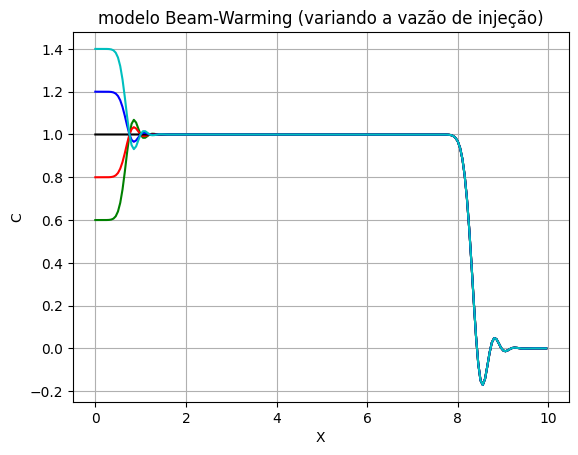

In [100]:
QsItr = []
xItr = []
for cInjItr in cInjItrs:
    x, Qs = metodoExManipulado(u,ca,cb,lX,tTotal,deltX,porcAvan, cInjItr)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'modelo Beam-Warming (variando a vazão de injeção)')
for cInjItr in cInjItrs:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

### Teste de variação de deltaT forçados
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$
- $\Delta t = 0,012$

In [101]:
u = 0.25
ca = 1.0
cb = 0.0
lXs = 10.0
tTotal = 5
deltX = 0.05
porcAvans = 1/2
deltTs = 0.0116*np.array([0.5,1.0,2.0])
# percentual de como os volumes estam preenchidos

In [102]:
def metodoExManipulado(u,ca,cb,lX,tTotal,deltX,porcAvan, deltT):
    # definicao do numero de volumes
    nx = int(lX/deltX)
    print(f'numero de volumes: {nx}')
    n = int(tTotal/deltT)
    print(f'valor passo de tempo deltaT: {deltT}')
    print(f'numero de passos de tempo: {n}')
    # inicializando o vetor considerando as condicoes de contorno
    qInit = []
    for i in range(nx):
        if i < int(nx*porcAvan):
            qInit.append(ca)
        if i >= int(nx*porcAvan):
            qInit.append(cb)
    # inicia o c iterativo
    #---------------------
    cItr = ca
    qFinal = qInit
    espaco = [0.0]
    for k in range(nx-1):
        espaco.append(espaco[k] + deltX)
    for i in range(n):
        qItr = []
        #-----------------
        #definição de mudança de vazão
        if i >= n/2:
            cItr = ca*1.2
        q0 = 2*cItr - qFinal[0]
        for j in range(nx):
            if j == 0:
                qItr.append(
                    qFinal[j] - (deltT/deltX)*
                    (u*(qFinal[j]-q0)))
            elif j == 1:
                qItr.append(
                qFinal[j] - (deltT/(2*deltX))*
                    (u*(3*qFinal[j]-4*qFinal[j-1] +q0)) + (deltT**2/(2*deltX**2))*
                    ((u**2)*(qFinal[j] -2*qFinal[j-1] + q0)))
            else:
                qItr.append(
                qFinal[j] - (deltT/(2*deltX))*
                    (u*(3*qFinal[j]-4*qFinal[j-1] +qFinal[j-2])) + (deltT**2/(2*deltX**2))*
                    ((u**2)*(qFinal[j] -2*qFinal[j-1] + qFinal[j-2])))
        qFinal = qItr
    return espaco, qFinal
    

numero de volumes: 200
valor passo de tempo deltaT: 0.0058
numero de passos de tempo: 862
numero de volumes: 200
valor passo de tempo deltaT: 0.0116
numero de passos de tempo: 431
numero de volumes: 200
valor passo de tempo deltaT: 0.0232
numero de passos de tempo: 215


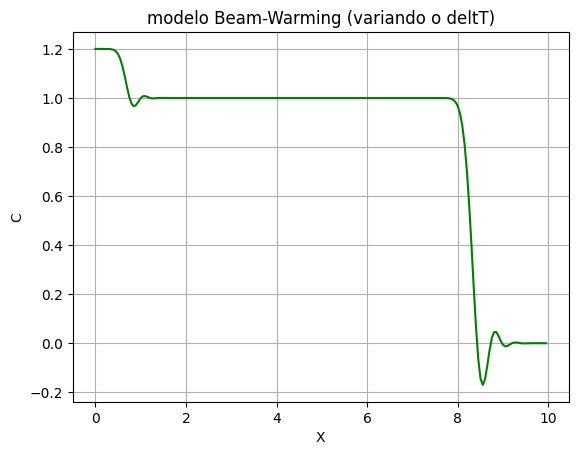

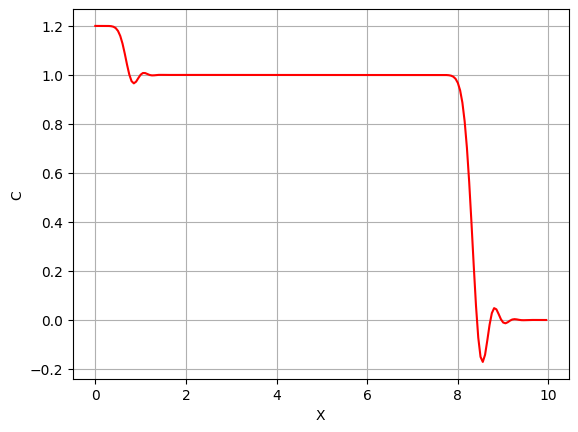

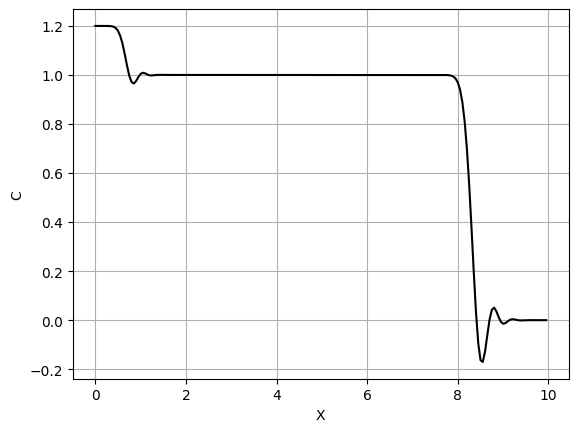

In [103]:
QsItr = []
xItr = []
for deltT in deltTs:
    x, Qs = metodoExManipulado(u,ca,cb,lX,tTotal,deltX,porcAvan, deltT)
    xItr.append(x)
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'modelo Beam-Warming (variando o deltT)')
for deltT in deltTs:
    plt.plot(xItr[i],QsItr[i], color = colors[i])
    i+=1
    plt.xlabel('X')
    plt.ylabel('C')
    plt.grid()
    plt.show()